In [1]:
import math
import numpy as np

# Elliptical, parabolic, and hyperbolic orbits using the Euler method

In the simple_two_body.ipynb notebook I implemented circular orbits with arbitary starting positions and confirmed that the truncation error converged linearly with timestep for the Euler method.  

In this notebook I plan to implement hyperbolic, elliptical, and parabolic orbits using the Euler method. Parabolic orbits are marginally bound, hyperbolic orbits are unbound, and elliptical orbits are bound but oblong. All orbits should have the center of mass at one focus for both stars orbit and be symmetric between the two stars. 

Elliptical orbits should be elongated away from the other star. 

Hyperbolic and parabolic orbits should open away from the other star. 

All orbits should conserve energy and angular momentum. Later this could be enforced. I will probably not do that in this notebook. 

It would be meaningless to evaluate the L0 error for a hyperbolic or parabolic orbit since there is no cycle and the L0 error is found after one or more cycles when the system returns to its starting point. However, it would be possible to evaluate it for the elliptical orbit system, and I intend to check that the convergence of the L0 error with dt is linear as it should be for the Euler method. 

Because the convergence can be tested for ellipses only and because ellipses are closed so make it clear if they are not working correctly graphically, I will begin with ellipses then proceed to parabolas and hyperbolas. 

# Conic sections

Circles, ellipses, parabolas, and hyperbolas are called conic sections because they can all be obtained by taking slices of an infinite cone. 

Conic sections are related to each other through a parameter called eccentricity. Circles have an eccentricity of 0. Ellipses have an eccentricity of 0<e<1. Parabolas have an eccentricity of e=1. Hyperbolas have an eccentricity of e>1. 

Circles are described by the equation x^2+y^2=r^2 where r is the radius. They can also be described parametrically using sine and cosine. That is done below. 

In [2]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
radius=10
t=2*math.pi*0.01*np.arange(103)
centerx=3
centery=5
p = figure(title="Circle", plot_width=400, plot_height=400)
p.line(centerx+np.cos(t),centery+np.sin(t),line_width=3,line_color="blue",legend="Circle")
p.circle(centerx,centery,line_width=15,line_color="green",legend="Center")
p.legend.location="bottom_right"
show(p)

Loading BokehJS ...

Ellipses are shaped like ovals. They have two locations called focuses that determine their shapes. If a string were connected to both focuses, which are inside the ellipse, you could slide a pencil along the string and draw the ellipse keeping the string taut. The two focuses and the ellipse form a triangle with hypoteneuses of fixed length. 

Half the shorter of the two widths of the ellipse is called the semimajor axis, a. It's like a radius for ellipses. The lenght of the longer width is (1+e)*a. The focus is offset from the center by f=e*sqrt(1-e^2)*a. 

Ellipses can also be drawn at angles to the axis. An ellipse aligned with the x and y axis is shown below. 

The nonparametric equation for an ellipse is x^2/a^2+y^2/b^2=1
Below the ellipse is described parametrically. 

In [3]:
def getfocus(a,ecc):
    b=a*(1+ecc)
    #return np.sqrt(b**2-a**2)
    return ecc*np.sqrt(1-ecc**2)*b

In [4]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
radius=10
t=2*math.pi*0.01*np.arange(103)
a=10
ecc=.5
b=a*(1+ecc)
centerx=0
centery=0
focusx=centerx+getfocus(a,ecc)
focusy=centery+0.0
p = figure(title="Ellipse", plot_width=400, plot_height=400, x_range=[-15,15], y_range=[-15,15])
p.line(centerx+b*np.cos(t),centery+a*np.sin(t),line_width=3,line_color="blue",legend="Circle")
p.circle(focusx,focusy,line_width=15,line_color="green",legend="Focus 1")
p.circle(centerx-getfocus(a,ecc),focusy, line_width=15, line_color="red", legend="Focus 2")
p.legend.location="bottom_right"
show(p)

Loading BokehJS ...

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def NewtonianForce(mass1,mass2, r):
    return (6.67408*10**-11)*mass1*mass2/r/r;

In [6]:
def euler(h,t, x,y,z,f,debugprint):
    xstep = (f(t, x, y,z)+f(t+h,x+h,y,z))/2*h
    xnew=x+xstep
    if(debugprint):
        print(h,t,x,xstep,xnew)
    return t+h,xnew

In [7]:
import math
def InitialDataEqualMassConic(radius,ecc,angle,initmass):
    orbitalangle=angle
    print("angle",angle)
    phi=np.array([math.pi+orbitalangle,orbitalangle])
    orbitalradius=radius*np.ones(2) #semimajor axis
    eccentricity=ecc
    print(eccentricity)
    mass=np.ones(2)
    masses=initmass*mass #*masssun (natural units)
    return phi,orbitalangle,orbitalradius,eccentricity, masses
    

In [8]:
import random,numpy as np
rad0=100
ecc0=0.5
angle0=0.0
mass0=1.0
initdateqellipse=InitialDataEqualMassConic(rad0,ecc0,angle0,mass0)
print(initdateqellipse)

angle 0.0
0.5
(array([3.14159265, 0.        ]), 0.0, array([100., 100.]), 0.5, array([1., 1.]))


In [9]:
def getxyuveqconicredmass(initdat):
    phi,orbitangle,orbitalradius,eccentricity, masses=initdat
    print("initdat", orbitalradius, phi, np.cos(phi), np.sin(phi))
    metersperAU=1
    Gconstant=1
    #fix x0 y0 at one star, disregard initial data, use orbital radius as separation between stars
    #this is consistant with choice in previous part
    cosphi=np.cos(phi)
    sinphi=np.sin(phi)
    coordsep=orbitalradius #/2.
    print("coordsep",coordsep)
    #x0=orbitalradius/2.*np.cos(phi)*metersperAU
    #y0=orbitalradius/2.*np.sin(phi)*metersperAU
    count=0
    for phi0 in phi:
        if phi0==0:
            print("zero")
            #x0[count]=orbitalradius[count]/2.
            #y0[count]=0
            cosphi[count]=1.0
            sinphi[count]=0.0
        if phi0==math.pi:
            cosphi[count]=-1.0
            sinphi[count]=0.0
            print("pi")
            #x0[count]=-orbitalradius[count]/2.
            #y0[count]=0
        if phi0==math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=1.0
            #x0[count]=0
            #y0[count]=orbitalradius[count]/2.
        if phi0==3*math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=-1.0
            #x0[count]=0
            #y0[count]=-orbitalradius[count]/2.
        count+=1
    x0=coordsep*cosphi
    y0=coordsep*sinphi
    #x0[1]=0.0
    #y0[1]=0.0
    z0=np.zeros(2)
    print(x0)
    print(y0)
    v=np.zeros(2)
    a=np.zeros(2)
    ax0=0.
    ay0=0.
    az0=0.
    vx0=0.
    vy0=0.
    vz0=0.
    print(eccentricity)
    reducedmass=np.zeros(2)
    reducedmass[0]=masses[0]+masses[1]
    reducedmass[1]=masses[0]*masses[1]/reducedmass[0]
    if eccentricity<1 and eccentricity>0:
        #elliptical
        orbitalr=orbitalradius[0]/2. #reduced mass
        focusdisp=getfocus(orbitalr,eccentricity) #displacement of the center due to the focus being at the center
        E=-Gconstant*reducedmass[0]*reducedmass[1]/(2*orbitalr) #orbitalradius is correct here r1+r2.
        #This factor of half is due to the virial (VEE-REE-AHL) theorem, a stellar dynamics theorem governing the 
        #equipartion of degrees of freedom of energy in a system. Another way of writing it is T=-1/2*V. 2T-V=0
        coordsep=orbitalr*(1.+eccentricity) #starts at apastron
        starsep=coordsep #reduced mass, M is at center
        Eapastron=-Gconstant*reducedmass[0]*reducedmass[1]/(2*starsep) #virial theorem again 
        Fapastron=Eapastron/(starsep)
        print("E,F",E,Eapastron,2*Eapastron, 2*orbitalr,starsep)
        print("pos",coordsep, focusdisp, 2*coordsep-focusdisp)
        x0=(coordsep)*cosphi
        y0=(coordsep)*sinphi
        x0[0]=0.0
        y0[0]=0.0
        v=np.zeros(2)
        v[0]=0.0
        vwikipedia=np.sqrt(reducedmass[0]*(2./starsep-1./orbitalr))
        v[1]=np.sqrt(2.*(E-2.*Eapastron)/reducedmass[1]) #1/2*mv^2-GMm/starsep=E. Solve for v. Eapastron=-GMm/2starsep
        print("vtest",vwikipedia,v[1])
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        a[0]=0.0
        a[1]=Fapastron/reducedmass[1]
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    elif eccentricity[0]==0.0: #circular
        #start at perihelion for both (eliptical, doesn't generalize to three body)
        #actually start with circular orbit
        ux0=np.zeros(2) #*149597870700
        #centrepital force balances gravitational force
        metersperAU=1 #natural units
        #G=1
        Gconstant=1
        #Fcentripital=mass1*v**2/rphys
        #centF=accel
        #Faccel=G*m1*m2/r^2
        r0=2.*orbitalradius #Mystery factor of 2
        print("r0", r0)
        v=np.zeros(2)
        for i in np.arange(2):
            v[i]=np.sqrt(Gconstant*masses[(i+1)%2]/np.abs(r0[i]))
        print(v)
        #r0=orbitalradius #np.sqrt(x0**2+y0**2)
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        for i in np.arange(2):
            a[i]=Gconstant*masses[(i+1)%2]/(r0[i]**2)
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    
    
    return reducedmass,x0,y0,z0, ux0, uy0,uz0, ax0, ay0,az0

In [10]:
xyuvaeqconicredmass=getxyuveqconicredmass(initdateqellipse)
print(xyuvaeqconicredmass)

initdat [100. 100.] [3.14159265 0.        ] [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep [100. 100.]
pi
zero
[-100.  100.]
[0. 0.]
0.5
E,F -0.01 -0.006666666666666667 -0.013333333333333334 100.0 75.0
pos 75.0 32.47595264191645 117.52404735808355
vtest 0.11547005383792516 0.11547005383792516
(array([2. , 0.5]), array([ 0., 75.]), array([0., 0.]), array([0., 0.]), array([-0., -0.]), array([-0.        ,  0.11547005]), array([0., 0.]), array([0.        , 0.00017778]), array([-0.,  0.]), array([0., 0.]))


In [11]:
def timestep(step,t,dt,mtotal, mass,xi,yi,zi, vxi, vyi, vzi, axi, ayi, azi):
    xii=np.zeros(np.size(xi))
    vxii=np.zeros(np.size(vxi))
    yii=np.zeros(np.size(yi))
    vyii=np.zeros(np.size(vyi))
    zii=np.zeros(np.size(vzi))
    vzii=np.zeros(np.size(vzi))
    rii=np.zeros(np.size(xi))
    axii=np.zeros(np.size(axi))
    ayii=np.zeros(np.size(ayi))
    azii=np.zeros(np.size(azi))
    
    #This is redundant in the center of mass system
    Gconstant=6.408*10**-11
    Gconstant=1
    for k in np.arange(len(rii)):
        for j in np.arange(len(rii)):
            if j!=k:
                if j==0: #reduced mass
                    axii[0]=0.0
                    ayii[0]=0.0
                    azii[0]=0.0
                else:
                    rreljk=np.abs((xi[j] - xi[k])**2+(yi[j]-yi[k])**2+(zi[j]-zi[k])**2)**(1./2.)
                    #print(rreljk)
                    axii[j]-=Gconstant*mass[k]*(xi[j]  - xi[k])/rreljk**3
                    ayii[j]-=Gconstant*mass[k]*(yi[j]  - yi[k])/rreljk**3
                    azii[j]-=Gconstant*mass[k]*(zi[j]  - zi[k])/rreljk**3
    #print(xii)
    
    for m in np.arange(len(x)):
        #m represents choices of mass
        i=step
        
        xii[m] = xi[m] + dt*vxi[m]
        vxii[m] = vxi[m] + dt*axi[m]
        yii[m]= yi[m] + dt*vyi[m]
        vyii[m] = vyi[m] + dt*ayi[m]
        zii[m]= zi[m] + dt*vzi[m]
        vzii[m] = vzi[m] + dt*azi[m]
        rii[m]=np.sqrt(xi[m]**2+yi[m]**2+zi[m]**2)
        
        #print(vyii[m],vyi[m],ayi[m],dt)
        #print(yii[m],yi[m],vyi[m],dt)
    
    
    return mass, xii,yii,zii,vxii,vyii,vzii,axii,ayii,azii
                    

In [12]:
dt=1 #*31556926 #seconds per year
numsteps=10000
mass0,x,y,z0,vx,vy,vz0,ax,ay,az0=xyuvaeqconicredmass
print(x)
xcoord1=[]
xcoord2=[]
ycoord1=[]
ycoord2=[]
t=0.0
masstotal=1.
for i in np.arange(1,numsteps):
    mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(i,t,dt,masstotal,mass0,x,y,z0,vx,vy,vz0,ax,ay,az0)
    print(x,y,vx,vy,ax,ay)
    #print(ay) #forces should be equal and opposite, but in reduced mass framework accelerations are also equal and opposite
    #accelerations should evolve from y to x with time in a sinusoidal manner even in reduced mass framework
    #print(ax)
    xcoord1.append(x[0])
    xcoord2.append(x[1])
    ycoord1.append(y[0])
    ycoord2.append(y[1])
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(2,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(3,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(4,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 

[ 0. 75.]
[ 0. 75.] [0.         0.11547005] [0.         0.00017778] [-0.          0.11547005] [ 0.         -0.00035556] [0. 0.]
[ 0.         75.00017778] [0.         0.23094011] [ 0.         -0.00017778] [0.         0.11547005] [ 0.         -0.00035555] [ 0.00000000e+00 -5.47411642e-07]
[ 0. 75.] [0.         0.34641016] [ 0.         -0.00053333] [0.         0.11546951] [ 0.         -0.00035555] [ 0.00000000e+00 -1.09480382e-06]
[ 0.         74.99946667] [0.         0.46187967] [ 0.         -0.00088888] [0.         0.11546841] [ 0.         -0.00035554] [ 0.00000000e+00 -1.64218822e-06]
[ 0.         74.99857779] [0.         0.57734808] [ 0.         -0.00124443] [0.         0.11546677] [ 0.         -0.00035554] [ 0.00000000e+00 -2.18957391e-06]
[ 0.         74.99733336] [0.         0.69281485] [ 0.         -0.00159997] [0.         0.11546458] [ 0.         -0.00035554] [ 0.00000000e+00 -2.73696998e-06]
[ 0.        74.9957334] [0.         0.80827943] [ 0.        -0.0019555] [0.         0.11

[ 0.         71.30203343] [ 0.         16.58191286] [ 0.         -0.05173014] [0.         0.10959913] [ 0.         -0.00036339] [ 0.00000000e+00 -8.38907708e-05]
[ 0.         71.25030329] [ 0.       16.691512] [ 0.         -0.05209353] [0.         0.10951524] [ 0.         -0.00036351] [ 0.00000000e+00 -8.45368977e-05]
[ 0.         71.19820976] [ 0.         16.80102724] [ 0.         -0.05245704] [0.        0.1094307] [ 0.         -0.00036362] [ 0.00000000e+00 -8.51845114e-05]
[ 0.         71.14575272] [ 0.         16.91045794] [ 0.         -0.05282066] [0.         0.10934552] [ 0.         -0.00036374] [ 0.00000000e+00 -8.58336253e-05]
[ 0.         71.09293205] [ 0.         17.01980346] [ 0.        -0.0531844] [0.         0.10925969] [ 0.         -0.00036386] [ 0.00000000e+00 -8.64842528e-05]
[ 0.         71.03974765] [ 0.         17.12906315] [ 0.         -0.05354826] [0.        0.1091732] [ 0.         -0.00036397] [ 0.00000000e+00 -8.71364072e-05]
[ 0.         70.98619939] [ 0.        

[ 0.         64.04105945] [ 0.         27.30783032] [ 0.         -0.08990428] [0.         0.09723567] [ 0.         -0.00037937] [ 0.         -0.00016096]
[ 0.         63.95115516] [ 0.         27.40506598] [ 0.         -0.09028365] [0.        0.0970747] [ 0.         -0.00037956] [ 0.         -0.00016185]
[ 0.         63.86087151] [ 0.         27.50214069] [ 0.         -0.09066321] [0.         0.09691285] [ 0.         -0.00037976] [ 0.         -0.00016274]
[ 0.        63.7702083] [ 0.         27.59905354] [ 0.         -0.09104297] [0.         0.09675012] [ 0.         -0.00037995] [ 0.         -0.00016363]
[ 0.         63.67916533] [ 0.         27.69580366] [ 0.         -0.09142292] [0.         0.09658649] [ 0.         -0.00038015] [ 0.         -0.00016452]
[ 0.         63.58774241] [ 0.         27.79239015] [ 0.         -0.09180307] [0.         0.09642197] [ 0.         -0.00038034] [ 0.         -0.00016542]
[ 0.         63.49593934] [ 0.         27.88881211] [ 0.         -0.09218341] [0

[ 0.         50.34837847] [ 0.         37.61572634] [ 0.         -0.13734517] [0.         0.07011482] [ 0.         -0.00040543] [ 0.         -0.00030151]
[ 0.         50.21103329] [ 0.         37.68584115] [ 0.        -0.1377506] [0.         0.06981331] [ 0.         -0.00040564] [ 0.         -0.00030305]
[ 0.         50.07328269] [ 0.         37.75565446] [ 0.         -0.13815623] [0.         0.06951025] [ 0.         -0.00040584] [ 0.         -0.00030461]
[ 0.         49.93512646] [ 0.         37.82516472] [ 0.         -0.13856208] [0.         0.06920565] [ 0.         -0.00040605] [ 0.         -0.00030616]
[ 0.         49.79656438] [ 0.         37.89437037] [ 0.         -0.13896813] [0.         0.06889948] [ 0.         -0.00040626] [ 0.         -0.00030773]
[ 0.         49.65759625] [ 0.         37.96326985] [ 0.         -0.13937438] [0.         0.06859175] [ 0.         -0.00040646] [ 0.         -0.00030931]
[ 0.         49.51822187] [ 0.        38.0318616] [ 0.         -0.13978084] [0

[ 0.         30.55473426] [ 0.         43.39890884] [ 0.         -0.18768427] [0.         0.01875078] [ 0.         -0.00040908] [ 0.         -0.00057724]
[ 0.         30.36704999] [ 0.         43.41765963] [ 0.         -0.18809335] [0.         0.01817354] [ 0.         -0.00040871] [ 0.         -0.00058052]
[ 0.         30.17895665] [ 0.         43.43583317] [ 0.         -0.18850206] [0.         0.01759302] [ 0.         -0.00040833] [ 0.         -0.00058381]
[ 0.         29.99045459] [ 0.         43.45342619] [ 0.         -0.18891039] [0.         0.01700921] [ 0.         -0.00040794] [ 0.         -0.00058713]
[ 0.        29.8015442] [ 0.        43.4704354] [ 0.         -0.18931832] [0.         0.01642208] [ 0.         -0.00040753] [ 0.         -0.00059048]
[ 0.         29.61222588] [ 0.         43.48685748] [ 0.         -0.18972586] [0.        0.0158316] [ 0.         -0.00040711] [ 0.         -0.00059384]
[ 0.         29.42250002] [ 0.         43.50268908] [ 0.         -0.19013297] [0. 

[0.         2.86363713] [ 0.         39.41736128] [ 0.         -0.22929776] [ 0.         -0.09534716] [ 0.00000000e+00 -9.93659864e-05] [ 0.         -0.00126942]
[0.         2.63433937] [ 0.         39.32201413] [ 0.         -0.22939713] [ 0.         -0.09661657] [ 0.00000000e+00 -9.27803778e-05] [ 0.        -0.0012771]
[0.         2.40494224] [ 0.         39.22539755] [ 0.         -0.22948991] [ 0.         -0.09789368] [ 0.00000000e+00 -8.60750327e-05] [ 0.         -0.00128482]
[0.         2.17545234] [ 0.         39.12750388] [ 0.         -0.22957598] [ 0.         -0.09917849] [ 0.00000000e+00 -7.92480151e-05] [ 0.         -0.00129256]
[0.         1.94587635] [ 0.         39.02832539] [ 0.         -0.22965523] [ 0.         -0.10047105] [ 0.00000000e+00 -7.22973655e-05] [ 0.         -0.00130033]
[0.         1.71622112] [ 0.         38.92785433] [ 0.         -0.22972753] [ 0.         -0.10177139] [ 0.00000000e+00 -6.52211006e-05] [ 0.         -0.00130814]
[0.         1.48649359] [ 0.  

[  0.         -20.90410203] [ 0.         19.15983138] [ 0.         -0.15936045] [ 0.         -0.27846284] [0.        0.0018061] [ 0.         -0.00169235]
[  0.         -21.06346248] [ 0.         18.88136854] [ 0.         -0.15755435] [ 0.        -0.2801552] [0.         0.00183363] [ 0.         -0.00168063]
[  0.         -21.22101683] [ 0.         18.60121335] [ 0.         -0.15572072] [ 0.         -0.28183583] [0.         0.00186115] [ 0.         -0.00166834]
[  0.         -21.37673755] [ 0.         18.31937752] [ 0.         -0.15385956] [ 0.         -0.28350417] [0.         0.00188865] [ 0.         -0.00165549]
[  0.         -21.53059711] [ 0.         18.03587335] [ 0.         -0.15197092] [ 0.         -0.28515966] [0.         0.00191611] [ 0.         -0.00164206]
[  0.         -21.68256803] [ 0.         17.75071369] [ 0.         -0.15005481] [ 0.         -0.28680172] [0.         0.00194351] [ 0.         -0.00162805]
[  0.         -21.83262284] [ 0.         17.46391198] [ 0.        -0

[  0.         -26.37289041] [0.         1.15879749] [ 0.         -0.01939075] [ 0.         -0.33954456] [0.         0.00286646] [ 0.         -0.00016297]
[  0.         -26.39228116] [0.         0.81925292] [ 0.         -0.01652429] [ 0.         -0.33970753] [0.        0.0028672] [ 0.         -0.00012598]
[  0.         -26.40880545] [0.         0.47954539] [ 0.         -0.01365709] [ 0.         -0.33983351] [0.         0.00286714] [ 0.00000000e+00 -8.89999582e-05]
[  0.         -26.42246253] [0.         0.13971188] [ 0.         -0.01078995] [ 0.         -0.33992251] [0.         0.00286627] [ 0.00000000e+00 -5.20473571e-05]
[  0.         -26.43325248] [ 0.         -0.20021063] [ 0.         -0.00792367] [ 0.         -0.33997456] [0.         0.00286461] [ 0.0000000e+00 -1.5146952e-05]
[  0.         -26.44117616] [ 0.         -0.54018519] [ 0.         -0.00505907] [ 0.         -0.33998971] [0.         0.00286214] [0.00000000e+00 2.16784361e-05]
[  0.         -26.44623522] [ 0.        -0.880

[  0.         -15.80120656] [  0.         -29.56473124] [0.         0.18823733] [ 0.         -0.22597629] [0.         0.00085736] [0.         0.00157317]
[  0.         -15.61296924] [  0.         -29.79070753] [0.         0.18909469] [ 0.         -0.22440312] [0.         0.00083891] [0.         0.00156963]
[  0.         -15.42387455] [  0.         -30.01511065] [0.        0.1899336] [ 0.         -0.22283349] [0.         0.00082069] [0.         0.00156593]
[  0.         -15.23394095] [  0.         -30.23794413] [0.         0.19075429] [ 0.         -0.22126756] [0.        0.0008027] [0.         0.00156206]
[  0.         -15.04318666] [  0.         -30.45921169] [0.         0.19155698] [ 0.        -0.2197055] [0.         0.00078494] [0.         0.00155803]
[  0.         -14.85162968] [  0.         -30.67891719] [0.         0.19234192] [ 0.         -0.21814747] [0.         0.00076741] [0.         0.00155384]
[  0.         -14.65928777] [  0.         -30.89706466] [0.         0.19310933] [ 

[ 0.         12.49445413] [  0.         -48.17985576] [0.         0.20865278] [ 0.         -0.06735026] [ 0.         -0.00020069] [0.         0.00078592]
[ 0.         12.70310692] [  0.         -48.24720602] [0.         0.20845209] [ 0.         -0.06656434] [ 0.         -0.00020265] [0.         0.00078145]
[ 0.         12.91155901] [  0.         -48.31377036] [0.         0.20824944] [ 0.        -0.0657829] [ 0.         -0.00020458] [0.       0.000777]
[ 0.         13.11980845] [  0.         -48.37955326] [0.         0.20804486] [ 0.        -0.0650059] [ 0.         -0.00020647] [0.         0.00077259]
[ 0.         13.32785332] [  0.         -48.44455916] [0.         0.20783839] [ 0.         -0.06423331] [ 0.         -0.00020833] [0.         0.00076821]
[ 0.         13.53569171] [  0.         -48.50879246] [0.         0.20763007] [ 0.        -0.0634651] [ 0.         -0.00021015] [0.         0.00076385]
[ 0.         13.74332178] [  0.         -48.57225756] [0.         0.20741992] [ 0.    

[ 0.         36.64328633] [  0.         -51.67573736] [0.         0.17578064] [0.         0.00420134] [ 0.         -0.00028823] [0.         0.00040847]
[ 0.         36.81906697] [  0.         -51.67153602] [0.         0.17549241] [0.         0.00460981] [ 0.         -0.00028827] [0.         0.00040653]
[ 0.         36.99455938] [  0.         -51.66692622] [0.         0.17520414] [0.         0.00501634] [ 0.         -0.00028831] [0.         0.00040461]
[ 0.         37.16976352] [  0.         -51.66190988] [0.         0.17491583] [0.         0.00542095] [ 0.         -0.00028834] [0.        0.0004027]
[ 0.         37.34467935] [  0.         -51.65648893] [0.         0.17462749] [0.         0.00582365] [ 0.         -0.00028837] [0.        0.0004008]
[ 0.         37.51930684] [  0.         -51.65066528] [0.         0.17433912] [0.         0.00622445] [ 0.         -0.00028839] [0.         0.00039892]
[ 0.         37.69364596] [  0.         -51.64444083] [0.         0.17405073] [0.         0.

[ 0.         53.68052547] [  0.         -49.27880934] [0.         0.14558982] [0.         0.03866524] [ 0.         -0.00027764] [0.         0.00025577]
[ 0.         53.82611529] [  0.        -49.2401441] [0.         0.14531219] [0.         0.03892101] [ 0.         -0.00027746] [0.         0.00025471]
[ 0.         53.97142748] [  0.         -49.20122309] [0.         0.14503472] [0.         0.03917572] [ 0.         -0.00027729] [0.         0.00025366]
[ 0.        54.1164622] [  0.         -49.16204737] [0.         0.14475744] [0.         0.03942938] [ 0.         -0.00027711] [0.         0.00025262]
[ 0.         54.26121964] [  0.         -49.12261799] [0.         0.14448032] [0.       0.039682] [ 0.         -0.00027693] [0.         0.00025158]
[ 0.         54.40569996] [  0.         -49.08293599] [0.         0.14420339] [0.         0.03993358] [ 0.         -0.00027676] [0.         0.00025055]
[ 0.         54.54990335] [  0.         -49.04300241] [0.         0.14392663] [0.         0.0401

[ 0.         67.36808909] [  0.         -44.05775132] [0.         0.11769833] [0.         0.06046055] [ 0.         -0.00025851] [0.         0.00016959]
[ 0.         67.48578742] [  0.         -43.99729077] [0.         0.11743982] [0.         0.06063014] [ 0.         -0.00025833] [0.         0.00016894]
[ 0.         67.60322725] [  0.         -43.93666064] [0.        0.1171815] [0.         0.06079908] [ 0.         -0.00025815] [0.        0.0001683]
[ 0.         67.72040875] [  0.         -43.87586156] [0.         0.11692335] [0.         0.06096738] [ 0.         -0.00025797] [0.         0.00016766]
[ 0.        67.8373321] [  0.         -43.81489418] [0.         0.11666538] [0.         0.06113503] [ 0.         -0.00025779] [0.         0.00016702]
[ 0.         67.95399748] [  0.         -43.75375915] [0.        0.1164076] [0.         0.06130205] [ 0.         -0.00025761] [0.         0.00016639]
[ 0.         68.07040508] [  0.        -43.6924571] [0.         0.11614999] [0.         0.061468

[ 0.         73.46223149] [  0.         -40.49664666] [0.         0.10373962] [0.         0.06889539] [ 0.         -0.00024907] [0.         0.00013773]
[ 0.         73.56597111] [  0.         -40.42775127] [0.         0.10349055] [0.         0.06903312] [ 0.         -0.00024891] [0.         0.00013721]
[ 0.         73.66946166] [  0.         -40.35871815] [0.         0.10324164] [0.         0.06917033] [ 0.         -0.00024875] [0.        0.0001367]
[ 0.        73.7727033] [  0.         -40.28954782] [0.         0.10299289] [0.         0.06930703] [ 0.         -0.00024859] [0.         0.00013618]
[ 0.         73.87569619] [  0.        -40.2202408] [0.        0.1027443] [0.         0.06944321] [ 0.         -0.00024843] [0.         0.00013567]
[ 0.         73.97844049] [  0.         -40.15079758] [0.         0.10249588] [0.         0.06957889] [ 0.         -0.00024827] [0.         0.00013516]
[ 0.         74.08093637] [  0.        -40.0812187] [0.         0.10224761] [0.         0.069714

[ 0.         84.76778454] [  0.        -30.7170028] [0.         0.07304698] [0.         0.08288198] [ 0.         -0.00023142] [0.00000000e+00 8.41589869e-05]
[ 0.         84.84083153] [  0.         -30.63412082] [0.         0.07281556] [0.         0.08296614] [ 0.         -0.00023131] [0.00000000e+00 8.38193344e-05]
[ 0.         84.91364708] [  0.         -30.55115468] [0.         0.07258425] [0.         0.08304996] [ 0.        -0.0002312] [0.00000000e+00 8.34806255e-05]
[ 0.         84.98623133] [  0.         -30.46810473] [0.         0.07235305] [0.         0.08313344] [ 0.         -0.00023109] [0.00000000e+00 8.31428551e-05]
[ 0.         85.05858438] [  0.         -30.38497129] [0.         0.07212196] [0.         0.08321658] [ 0.         -0.00023098] [0.00000000e+00 8.28060177e-05]
[ 0.         85.13070634] [  0.         -30.30175471] [0.         0.07189099] [0.         0.08329938] [ 0.         -0.00023086] [0.00000000e+00 8.24701083e-05]
[ 0.         85.20259733] [  0.         -30.

[ 0.         91.43770787] [  0.         -21.16389776] [0.         0.04818469] [0.         0.09027959] [ 0.         -0.00022127] [0.00000000e+00 5.14602928e-05]
[ 0.         91.48589256] [  0.         -21.07361817] [0.         0.04796342] [0.         0.09033105] [ 0.        -0.0002212] [0.00000000e+00 5.11980141e-05]
[ 0.         91.53385598] [  0.         -20.98328711] [0.         0.04774222] [0.         0.09038225] [ 0.         -0.00022113] [0.00000000e+00 5.09362343e-05]
[ 0.        91.5815982] [  0.         -20.89290486] [0.         0.04752109] [0.         0.09043319] [ 0.         -0.00022106] [0.00000000e+00 5.06749504e-05]
[ 0.        91.6291193] [  0.         -20.80247167] [0.         0.04730004] [0.         0.09048386] [ 0.         -0.00022098] [0.00000000e+00 5.04141593e-05]
[ 0.         91.67641934] [  0.         -20.71198781] [0.         0.04707905] [0.         0.09053428] [ 0.         -0.00022091] [0.0000000e+00 5.0153858e-05]
[ 0.         91.72349839] [  0.         -20.6214

[ 0.         95.82780789] [ 0.         -9.27480722] [0.         0.02033135] [0.        0.0948751] [ 0.        -0.0002148] [0.00000000e+00 2.10066912e-05]
[ 0.         95.84813924] [ 0.         -9.17993213] [0.         0.02011655] [0.        0.0948961] [ 0.         -0.00021477] [0.00000000e+00 2.07867317e-05]
[ 0.         95.86825579] [ 0.         -9.08503602] [0.         0.01990178] [0.         0.09491689] [ 0.         -0.00021474] [0.00000000e+00 2.05669537e-05]
[ 0.         95.88815757] [ 0.         -8.99011913] [0.         0.01968704] [0.         0.09493746] [ 0.         -0.00021471] [0.00000000e+00 2.03473554e-05]
[ 0.         95.90784461] [ 0.         -8.89518168] [0.         0.01947233] [0.        0.0949578] [ 0.         -0.00021468] [0.00000000e+00 2.01279345e-05]
[ 0.         95.92731694] [ 0.         -8.80022387] [0.         0.01925765] [0.         0.09497793] [ 0.         -0.00021466] [0.0000000e+00 1.9908689e-05]
[ 0.         95.94657459] [ 0.         -8.70524594] [0.       

[ 0.         96.66155409] [0.         3.34950005] [ 0.         -0.00788706] [0.         0.09579042] [ 0.         -0.00021366] [ 0.00000000e+00 -7.19126898e-06]
[ 0.         96.65366703] [0.         3.44529047] [ 0.         -0.00810072] [0.         0.09578323] [ 0.         -0.00021367] [ 0.00000000e+00 -7.40400861e-06]
[ 0.         96.64556631] [0.         3.54107369] [ 0.         -0.00831439] [0.         0.09577582] [ 0.         -0.00021368] [ 0.00000000e+00 -7.61681878e-06]
[ 0.         96.63725192] [0.         3.63684952] [ 0.         -0.00852807] [0.         0.09576821] [ 0.         -0.00021369] [ 0.00000000e+00 -7.82970136e-06]
[ 0.         96.62872386] [0.         3.73261772] [ 0.         -0.00874176] [0.         0.09576038] [ 0.         -0.00021371] [ 0.00000000e+00 -8.04265826e-06]
[ 0.         96.61998209] [0.        3.8283781] [ 0.         -0.00895547] [0.         0.09575233] [ 0.         -0.00021372] [ 0.00000000e+00 -8.25569136e-06]
[ 0.         96.61102663] [0.         3.92

[ 0.         93.65521079] [ 0.         16.12924699] [ 0.         -0.03696792] [0.         0.09284118] [ 0.         -0.00021818] [ 0.0000000e+00 -3.7343813e-05]
[ 0.         93.61824287] [ 0.         16.22208817] [ 0.        -0.0371861] [0.         0.09280384] [ 0.         -0.00021824] [ 0.00000000e+00 -3.75844141e-05]
[ 0.         93.58105677] [ 0.         16.31489201] [ 0.         -0.03740433] [0.         0.09276625] [ 0.         -0.00021829] [ 0.00000000e+00 -3.78253741e-05]
[ 0.         93.54365244] [ 0.         16.40765826] [ 0.         -0.03762263] [0.         0.09272843] [ 0.         -0.00021835] [ 0.00000000e+00 -3.80666953e-05]
[ 0.         93.50602981] [ 0.         16.50038668] [ 0.         -0.03784097] [0.         0.09269036] [ 0.        -0.0002184] [ 0.00000000e+00 -3.83083804e-05]
[ 0.         93.46818884] [ 0.         16.59307704] [ 0.         -0.03805938] [0.         0.09265205] [ 0.         -0.00021846] [ 0.00000000e+00 -3.85504319e-05]
[ 0.         93.43012946] [ 0.    

[ 0.         87.25757489] [ 0.         27.45057597] [ 0.         -0.06500797] [0.         0.08609638] [ 0.         -0.00022791] [ 0.00000000e+00 -7.14194123e-05]
[ 0.         87.19256693] [ 0.         27.53667235] [ 0.         -0.06523587] [0.         0.08602496] [ 0.         -0.00022801] [ 0.00000000e+00 -7.17289083e-05]
[ 0.         87.12733105] [ 0.         27.62269731] [ 0.         -0.06546388] [0.         0.08595323] [ 0.         -0.00022811] [ 0.00000000e+00 -7.20391802e-05]
[ 0.         87.06186717] [ 0.         27.70865054] [ 0.         -0.06569199] [0.         0.08588119] [ 0.         -0.00022821] [ 0.00000000e+00 -7.23502324e-05]
[ 0.         86.99617519] [ 0.         27.79453173] [ 0.         -0.06592019] [0.         0.08580884] [ 0.         -0.00022831] [ 0.00000000e+00 -7.26620693e-05]
[ 0.       86.930255] [ 0.         27.88034057] [ 0.        -0.0661485] [0.         0.08573618] [ 0.         -0.00022841] [ 0.00000000e+00 -7.29746953e-05]
[ 0.        86.8641065] [ 0.      

[ 0.         73.77759448] [ 0.         40.15572759] [ 0.         -0.10324309] [0.         0.06994077] [ 0.         -0.00024881] [ 0.       -0.000135]
[ 0.        73.6743514] [ 0.         40.22566836] [ 0.        -0.1034919] [0.         0.06980577] [ 0.         -0.00024897] [ 0.         -0.00013551]
[ 0.        73.5708595] [ 0.         40.29547413] [ 0.         -0.10374087] [0.         0.06967026] [ 0.         -0.00024913] [ 0.         -0.00013602]
[ 0.         73.46711863] [ 0.         40.36514438] [ 0.      -0.10399] [0.         0.06953423] [ 0.         -0.00024929] [ 0.         -0.00013654]
[ 0.         73.36312862] [ 0.         40.43467861] [ 0.        -0.1042393] [0.         0.06939769] [ 0.         -0.00024945] [ 0.         -0.00013706]
[ 0.         73.25888933] [ 0.         40.50407631] [ 0.         -0.10448875] [0.         0.06926063] [ 0.         -0.00024961] [ 0.         -0.00013758]
[ 0.         73.15440057] [ 0.         40.57333694] [ 0.         -0.10473837] [0.         0.06

[ 0.         57.24443301] [ 0.        48.2335226] [ 0.         -0.13892841] [0.         0.04568099] [ 0.         -0.00027278] [ 0.         -0.00022906]
[ 0.        57.1055046] [ 0.         48.27920358] [ 0.         -0.13920119] [0.         0.04545192] [ 0.         -0.00027295] [ 0.         -0.00022999]
[ 0.         56.96630341] [ 0.         48.32465551] [ 0.         -0.13947414] [0.         0.04522194] [ 0.         -0.00027313] [ 0.         -0.00023091]
[ 0.         56.82682927] [ 0.         48.36987744] [ 0.         -0.13974727] [0.         0.04499102] [ 0.        -0.0002733] [ 0.         -0.00023184]
[ 0.       56.687082] [ 0.         48.41486846] [ 0.         -0.14002057] [0.         0.04475918] [ 0.         -0.00027348] [ 0.         -0.00023278]
[ 0.         56.54706143] [ 0.         48.45962764] [ 0.         -0.14029405] [0.        0.0445264] [ 0.         -0.00027366] [ 0.         -0.00023372]
[ 0.         56.40676738] [ 0.         48.50415404] [ 0.         -0.14056771] [0.       

[ 0.         45.25449244] [ 0.         51.08042783] [ 0.         -0.16126076] [0.         0.02401589] [ 0.         -0.00028468] [ 0.         -0.00032004]
[ 0.         45.09323168] [ 0.         51.10444373] [ 0.         -0.16154544] [0.         0.02369586] [ 0.         -0.00028478] [ 0.         -0.00032144]
[ 0.         44.93168624] [ 0.         51.12813958] [ 0.         -0.16183022] [0.         0.02337442] [ 0.         -0.00028487] [ 0.         -0.00032285]
[ 0.         44.76985602] [ 0.       51.151514] [ 0.        -0.1621151] [0.         0.02305157] [ 0.         -0.00028497] [ 0.         -0.00032427]
[ 0.         44.60774092] [ 0.         51.17456557] [ 0.         -0.16240006] [0.        0.0227273] [ 0.         -0.00028506] [ 0.         -0.00032569]
[ 0.         44.44534086] [ 0.         51.19729286] [ 0.         -0.16268513] [0.        0.0224016] [ 0.         -0.00028515] [ 0.         -0.00032713]
[ 0.         44.28265573] [ 0.         51.21969447] [ 0.         -0.16297028] [0.     

[ 0.         30.34132634] [ 0.         51.81359887] [ 0.         -0.18579717] [ 0.         -0.00957766] [ 0.         -0.00028061] [ 0.         -0.00047637]
[ 0.         30.15552917] [ 0.         51.80402121] [ 0.         -0.18607778] [ 0.         -0.01005403] [ 0.         -0.00028033] [ 0.         -0.00047871]
[ 0.         29.96945139] [ 0.         51.79396718] [ 0.         -0.18635811] [ 0.         -0.01053274] [ 0.         -0.00028003] [ 0.         -0.00048107]
[ 0.         29.78309329] [ 0.         51.78343445] [ 0.         -0.18663814] [ 0.        -0.0110138] [ 0.         -0.00027973] [ 0.         -0.00048344]
[ 0.         29.59645515] [ 0.         51.77242064] [ 0.         -0.18691787] [ 0.         -0.01149724] [ 0.         -0.00027942] [ 0.         -0.00048583]
[ 0.         29.40953728] [ 0.        51.7609234] [ 0.         -0.18719729] [ 0.         -0.01198307] [ 0.        -0.0002791] [ 0.         -0.00048823]
[ 0.         29.22233998] [ 0.         51.74894033] [ 0.        -0.187

[ 0.         -0.00224115] [ 0.         43.50752926] [ 0.         -0.21553515] [ 0.         -0.11674382] [ 0.00000000e+00 -5.13829223e-06] [ 0.         -0.00105094]
[ 0.        -0.2177763] [ 0.         43.39078544] [ 0.         -0.21554029] [ 0.         -0.11779476] [0.00000000e+00 5.44261962e-08] [ 0.         -0.00105658]
[ 0.         -0.43331659] [ 0.         43.27299068] [ 0.         -0.21554023] [ 0.         -0.11885133] [0.00000000e+00 5.33128215e-06] [ 0.         -0.00106223]
[ 0.         -0.64885682] [ 0.         43.15413935] [ 0.        -0.2155349] [ 0.         -0.11991356] [0.00000000e+00 1.06934849e-05] [ 0.        -0.0010679]
[ 0.         -0.86439172] [ 0.         43.03422578] [ 0.         -0.21552421] [ 0.         -0.12098147] [0.00000000e+00 1.61422561e-05] [ 0.         -0.00107359]
[ 0.         -1.07991593] [ 0.         42.91324432] [ 0.         -0.21550807] [ 0.         -0.12205505] [0.000000e+00 2.167883e-05] [ 0.         -0.00107929]
[ 0.       -1.295424] [ 0.         4

[  0.         -24.75623602] [ 0.         17.96466558] [ 0.        -0.1307127] [ 0.         -0.28820692] [0.        0.0017103] [ 0.        -0.0012677]
[  0.         -24.88694872] [ 0.         17.67645865] [ 0.        -0.1290024] [ 0.         -0.28947463] [0.         0.00173013] [ 0.         -0.00125549]
[  0.         -25.01595111] [ 0.         17.38698403] [ 0.         -0.12727227] [ 0.         -0.29073012] [0.         0.00174987] [ 0.         -0.00124288]
[  0.         -25.14322338] [ 0.         17.09625391] [ 0.        -0.1255224] [ 0.       -0.291973] [0.        0.0017695] [ 0.         -0.00122987]
[  0.         -25.26874578] [ 0.         16.80428091] [ 0.        -0.1237529] [ 0.         -0.29320286] [0.         0.00178902] [ 0.         -0.00121646]
[  0.         -25.39249867] [ 0.         16.51107805] [ 0.         -0.12196387] [ 0.         -0.29441932] [0.         0.00180842] [ 0.         -0.00120264]
[  0.         -25.51446254] [ 0.         16.21665873] [ 0.         -0.12015545] [ 

[  0.         -22.18706819] [  0.        -25.9020646] [0.         0.15133922] [ 0.         -0.25967651] [0.         0.00113602] [0.         0.00130405]
[  0.         -22.03572897] [  0.         -26.16174111] [0.         0.15247524] [ 0.         -0.25837246] [0.         0.00111856] [0.         0.00130585]
[  0.         -21.88325373] [  0.         -26.42011356] [0.        0.1535938] [ 0.         -0.25706661] [0.         0.00110122] [0.         0.00130741]
[  0.         -21.72965994] [  0.         -26.67718017] [0.         0.15469501] [ 0.        -0.2557592] [0.         0.00108401] [0.         0.00130875]
[  0.         -21.57496492] [  0.         -26.93293937] [0.         0.15577902] [ 0.         -0.25445045] [0.         0.00106693] [0.         0.00130986]
[  0.        -21.4191859] [  0.         -27.18738982] [0.         0.15684596] [ 0.         -0.25314059] [0.      0.00105] [0.         0.00131075]
[  0.         -21.26233994] [  0.         -27.44053041] [0.         0.15789595] [ 0.      

[0.        0.1605575] [  0.         -48.24563085] [0.         0.20258973] [ 0.         -0.12448827] [0.00000000e+00 7.54365686e-07] [0.         0.00086372]
[0.         0.36314723] [  0.         -48.37011912] [0.         0.20259049] [ 0.         -0.12362455] [ 0.00000000e+00 -2.85942963e-06] [0.         0.00085922]
[0.         0.56573772] [  0.         -48.49374367] [0.         0.20258763] [ 0.         -0.12276532] [ 0.00000000e+00 -6.41718481e-06] [0.         0.00085475]
[0.         0.76832535] [  0.       -48.616509] [0.         0.20258121] [ 0.         -0.12191057] [ 0.00000000e+00 -9.91971828e-06] [0.        0.0008503]
[0.         0.97090656] [  0.         -48.73841957] [0.         0.20257129] [ 0.         -0.12106028] [ 0.00000000e+00 -1.33678376e-05] [0.         0.00084586]
[0.         1.17347785] [  0.         -48.85947985] [0.         0.20255792] [ 0.         -0.12021442] [ 0.00000000e+00 -1.67623397e-05] [0.         0.00084145]
[0.         1.37603577] [  0.         -48.97969427

[ 0.         33.82416021] [  0.         -60.04006474] [0.         0.17656949] [ 0.         -0.02397862] [ 0.        -0.0002066] [0.         0.00036851]
[ 0.        34.0007297] [  0.         -60.06404335] [0.         0.17636289] [ 0.         -0.02361011] [ 0.         -0.00020671] [0.         0.00036693]
[ 0.         34.17709259] [  0.         -60.08765346] [0.         0.17615617] [ 0.         -0.02324318] [ 0.         -0.00020682] [0.         0.00036536]
[ 0.         34.35324876] [  0.         -60.11089664] [0.         0.17594935] [ 0.         -0.02287782] [ 0.         -0.00020693] [0.        0.0003638]
[ 0.         34.52919811] [  0.         -60.13377446] [0.         0.17574243] [ 0.         -0.02251402] [ 0.         -0.00020703] [0.         0.00036225]
[ 0.         34.70494054] [  0.         -60.15628847] [0.        0.1755354] [ 0.         -0.02215176] [ 0.         -0.00020712] [0.         0.00036071]
[ 0.         34.88047594] [  0.         -60.17844024] [0.         0.17532828] [ 0.  

[ 0.         54.28775588] [  0.         -60.60702922] [0.         0.15076023] [0.         0.01224504] [ 0.         -0.00020168] [0.         0.00022583]
[ 0.         54.43851611] [  0.         -60.59478418] [0.         0.15055855] [0.         0.01247087] [ 0.         -0.00020156] [0.         0.00022502]
[ 0.         54.58907465] [  0.         -60.58231331] [0.         0.15035699] [0.        0.0126959] [ 0.         -0.00020144] [0.         0.00022422]
[ 0.         54.73943164] [  0.         -60.56961741] [0.         0.15015554] [0.         0.01292012] [ 0.         -0.00020132] [0.         0.00022342]
[ 0.         54.88958718] [  0.         -60.55669729] [0.         0.14995423] [0.         0.01314354] [ 0.        -0.0002012] [0.         0.00022263]
[ 0.         55.03954141] [  0.         -60.54355376] [0.         0.14975303] [0.         0.01336616] [ 0.         -0.00020107] [0.         0.00022183]
[ 0.         55.18929444] [  0.         -60.53018759] [0.         0.14955195] [0.       0.01

[ 0.         62.70236985] [  0.         -59.54686566] [0.        0.1392744] [0.         0.02412031] [ 0.         -0.00019409] [0.        0.0001848]
[ 0.         62.84164425] [  0.         -59.52274536] [0.         0.13908032] [0.         0.02430511] [ 0.         -0.00019395] [0.         0.00018419]
[ 0.         62.98072457] [  0.         -59.49844025] [0.         0.13888637] [0.        0.0244893] [ 0.         -0.00019381] [0.         0.00018358]
[ 0.         63.11961094] [  0.         -59.47395095] [0.         0.13869256] [0.         0.02467287] [ 0.         -0.00019367] [0.         0.00018296]
[ 0.        63.2583035] [  0.         -59.44927808] [0.         0.13849889] [0.         0.02485584] [ 0.         -0.00019354] [0.         0.00018236]
[ 0.         63.39680239] [  0.         -59.42442224] [0.         0.13830535] [0.        0.0250382] [ 0.        -0.0001934] [0.         0.00018175]
[ 0.         63.53510774] [  0.         -59.39938404] [0.         0.13811195] [0.         0.02521995

[ 0.         75.44977179] [  0.         -56.38946093] [0.         0.12090872] [0.       0.039669] [ 0.         -0.00018069] [0.         0.00013536]
[ 0.         75.57068051] [  0.         -56.34979193] [0.         0.12072802] [0.         0.03980436] [ 0.         -0.00018056] [0.         0.00013495]
[ 0.         75.69140853] [  0.         -56.30998757] [0.         0.12054746] [0.         0.03993931] [ 0.         -0.00018043] [0.         0.00013454]
[ 0.         75.81195599] [  0.         -56.27004827] [0.         0.12036703] [0.         0.04007385] [ 0.        -0.0001803] [0.         0.00013413]
[ 0.         75.93232303] [  0.         -56.22997442] [0.         0.12018673] [0.         0.04020798] [ 0.         -0.00018017] [0.         0.00013373]
[ 0.         76.05250976] [  0.         -56.18976644] [0.         0.12000657] [0.        0.0403417] [ 0.         -0.00018004] [0.         0.00013332]
[ 0.         76.17251633] [  0.         -56.14942474] [0.         0.11982653] [0.         0.0404

[ 0.         89.59913999] [  0.         -50.28275718] [0.         0.09861948] [0.         0.05421315] [ 0.         -0.00016533] [0.00000000e+00 9.29824699e-05]
[ 0.         89.69775947] [  0.         -50.22854404] [0.         0.09845416] [0.         0.05430613] [ 0.         -0.00016522] [0.0000000e+00 9.2720912e-05]
[ 0.         89.79621362] [  0.         -50.17423791] [0.         0.09828894] [0.         0.05439885] [ 0.         -0.00016511] [0.00000000e+00 9.24601771e-05]
[ 0.         89.89450256] [  0.         -50.11983906] [0.         0.09812382] [0.         0.05449131] [ 0.         -0.00016501] [0.00000000e+00 9.22002614e-05]
[ 0.         89.99262638] [  0.         -50.06534775] [0.         0.09795881] [0.         0.05458351] [ 0.        -0.0001649] [0.0000000e+00 9.1941161e-05]
[ 0.        90.0905852] [  0.         -50.01076424] [0.         0.09779391] [0.         0.05467545] [ 0.        -0.0001648] [0.00000000e+00 9.16828722e-05]
[ 0.         90.18837911] [  0.         -49.956088

[  0.         101.14666376] [  0.         -42.47624557] [0.         0.07778221] [0.         0.06442831] [ 0.        -0.0001533] [0.00000000e+00 6.45250303e-05]
[  0.         101.22444598] [  0.         -42.41181726] [0.         0.07762891] [0.         0.06449284] [ 0.         -0.00015322] [0.00000000e+00 6.43448103e-05]
[  0.         101.30207489] [  0.         -42.34732442] [0.         0.07747569] [0.         0.06455718] [ 0.         -0.00015314] [0.00000000e+00 6.41650475e-05]
[  0.         101.37955059] [  0.         -42.28276724] [0.         0.07732255] [0.         0.06462135] [ 0.         -0.00015306] [0.00000000e+00 6.39857398e-05]
[  0.         101.45687314] [  0.         -42.21814589] [0.         0.07716949] [0.         0.06468533] [ 0.         -0.00015299] [0.00000000e+00 6.38068855e-05]
[  0.         101.53404262] [  0.         -42.15346056] [0.        0.0770165] [0.         0.06474914] [ 0.         -0.00015291] [0.00000000e+00 6.36284824e-05]
[  0.         101.61105912] [  0

[  0.         109.82268722] [  0.         -33.83339648] [0.         0.05887936] [0.         0.07131529] [ 0.         -0.00014479] [0.0000000e+00 4.4724719e-05]
[  0.         109.88156657] [  0.         -33.76208119] [0.         0.05873456] [0.         0.07136002] [ 0.         -0.00014474] [0.00000000e+00 4.45894792e-05]
[  0.         109.94030114] [  0.         -33.69072117] [0.         0.05858983] [0.         0.07140461] [ 0.         -0.00014468] [0.00000000e+00 4.44545069e-05]
[  0.         109.99889097] [  0.         -33.61931656] [0.         0.05844515] [0.         0.07144906] [ 0.         -0.00014463] [0.00000000e+00 4.43198009e-05]
[  0.         110.05733611] [  0.        -33.5478675] [0.         0.05830052] [0.         0.07149338] [ 0.         -0.00014457] [0.000000e+00 4.418536e-05]
[  0.         110.11563663] [  0.         -33.47637412] [0.         0.05815595] [0.         0.07153757] [ 0.         -0.00014451] [0.00000000e+00 4.40511832e-05]
[  0.         110.17379258] [  0.   

[  0.         116.19978857] [  0.         -24.38510557] [0.         0.04074727] [0.         0.07602123] [ 0.         -0.00013889] [0.0000000e+00 2.9247066e-05]
[  0.         116.24053584] [  0.         -24.30908434] [0.         0.04060838] [0.         0.07605047] [ 0.         -0.00013885] [0.00000000e+00 2.91382501e-05]
[  0.         116.28114422] [  0.         -24.23303387] [0.         0.04046953] [0.         0.07607961] [ 0.         -0.00013881] [0.00000000e+00 2.90295875e-05]
[  0.         116.32161375] [  0.         -24.15695425] [0.         0.04033072] [0.         0.07610864] [ 0.         -0.00013878] [0.00000000e+00 2.89210775e-05]
[  0.         116.36194447] [  0.         -24.08084561] [0.         0.04019194] [0.         0.07613756] [ 0.         -0.00013874] [0.00000000e+00 2.88127195e-05]
[  0.         116.40213641] [  0.         -24.00470805] [0.        0.0400532] [0.         0.07616638] [ 0.        -0.0001387] [0.00000000e+00 2.87045128e-05]
[  0.         116.44218961] [  0. 

[  0.         121.03002518] [  0.         -11.68084276] [0.        0.0184977] [0.         0.07944218] [ 0.         -0.00013466] [0.00000000e+00 1.30871434e-05]
[  0.         121.04852289] [  0.         -11.60140058] [0.         0.01836304] [0.         0.07945526] [ 0.         -0.00013465] [0.00000000e+00 1.29952608e-05]
[  0.         121.06688592] [  0.         -11.52194532] [0.         0.01822839] [0.         0.07946826] [ 0.         -0.00013463] [0.00000000e+00 1.29034382e-05]
[  0.         121.08511431] [  0.         -11.44247706] [0.         0.01809376] [0.         0.07948116] [ 0.         -0.00013462] [0.00000000e+00 1.28116752e-05]
[  0.         121.10320807] [  0.        -11.3629959] [0.         0.01795914] [0.         0.07949397] [ 0.        -0.0001346] [0.00000000e+00 1.27199712e-05]
[  0.         121.12116721] [  0.         -11.28350192] [0.         0.01782453] [0.         0.07950669] [ 0.         -0.00013459] [0.00000000e+00 1.26283259e-05]
[  0.         121.13899174] [  0. 

[  0.       122.044553] [ 0.         -5.69250223] [0.         0.00843248] [0.         0.08017222] [ 0.         -0.00013384] [0.00000000e+00 6.33121131e-06]
[  0.         122.05298548] [ 0.         -5.61233001] [0.         0.00829864] [0.         0.08017856] [ 0.         -0.00013384] [0.00000000e+00 6.24255383e-06]
[  0.         122.06128412] [ 0.         -5.53215145] [0.        0.0081648] [0.        0.0801848] [ 0.         -0.00013383] [0.00000000e+00 6.15392236e-06]
[  0.         122.06944892] [ 0.         -5.45196666] [0.         0.00803097] [0.         0.08019095] [ 0.         -0.00013383] [0.00000000e+00 6.06531648e-06]
[  0.         122.07747989] [ 0.        -5.3717757] [0.         0.00789714] [0.         0.08019702] [ 0.         -0.00013382] [0.00000000e+00 5.97673574e-06]
[  0.         122.08537703] [ 0.         -5.29157869] [0.         0.00776332] [0.         0.08020299] [ 0.         -0.00013381] [0.00000000e+00 5.88817971e-06]
[  0.         122.09314036] [ 0.         -5.211375

[  0.         122.28934418] [0.        0.9752268] [ 0.         -0.00266585] [0.         0.08039761] [ 0.         -0.00013372] [ 0.00000000e+00 -9.78457587e-07]
[  0.         122.28667833] [0.         1.05562441] [ 0.         -0.00279957] [0.         0.08039663] [ 0.         -0.00013372] [ 0.00000000e+00 -1.06642017e-06]
[  0.         122.28387876] [0.         1.13602105] [ 0.         -0.00293329] [0.         0.08039556] [ 0.         -0.00013373] [ 0.00000000e+00 -1.15439233e-06]
[  0.         122.28094546] [0.         1.21641661] [ 0.         -0.00306702] [0.         0.08039441] [ 0.         -0.00013373] [ 0.00000000e+00 -1.24237452e-06]
[  0.         122.27787844] [0.         1.29681102] [ 0.         -0.00320076] [0.         0.08039317] [ 0.         -0.00013374] [ 0.00000000e+00 -1.33036715e-06]
[  0.         122.27467769] [0.         1.37720419] [ 0.         -0.00333449] [0.         0.08039184] [ 0.         -0.00013374] [ 0.00000000e+00 -1.41837065e-06]
[  0.         122.27134319] [0

[  0.         121.73052509] [0.         6.91628707] [ 0.         -0.01257846] [0.        0.0800865] [ 0.        -0.0001343] [ 0.00000000e+00 -7.54157067e-06]
[  0.         121.71794662] [0.         6.99637357] [ 0.         -0.01271277] [0.         0.08007896] [ 0.         -0.00013432] [ 0.00000000e+00 -7.63141354e-06]
[  0.         121.70523386] [0.         7.07645253] [ 0.         -0.01284709] [0.         0.08007133] [ 0.         -0.00013433] [ 0.00000000e+00 -7.72129838e-06]
[  0.         121.69238677] [0.         7.15652386] [ 0.         -0.01298142] [0.         0.08006361] [ 0.         -0.00013434] [ 0.00000000e+00 -7.81122563e-06]
[  0.         121.67940536] [0.         7.23658746] [ 0.         -0.01311576] [0.         0.08005579] [ 0.         -0.00013436] [ 0.00000000e+00 -7.90119575e-06]
[  0.        121.6662896] [0.         7.31664326] [ 0.         -0.01325011] [0.         0.08004789] [ 0.         -0.00013437] [ 0.00000000e+00 -7.99120919e-06]
[  0.         121.65303949] [0.   

[  0.         120.05880333] [ 0.         14.08318584] [ 0.         -0.02472996] [0.         0.07904182] [ 0.         -0.00013591] [ 0.00000000e+00 -1.58502868e-05]
[  0.         120.03407337] [ 0.         14.16222767] [ 0.         -0.02486588] [0.         0.07902597] [ 0.         -0.00013594] [ 0.00000000e+00 -1.59457974e-05]
[  0.         120.00920749] [ 0.         14.24125364] [ 0.         -0.02500182] [0.         0.07901003] [ 0.         -0.00013596] [ 0.00000000e+00 -1.60413936e-05]
[  0.         119.98420568] [ 0.         14.32026367] [ 0.         -0.02513778] [0.         0.07899399] [ 0.         -0.00013599] [ 0.00000000e+00 -1.61370759e-05]
[  0.        119.9590679] [ 0.         14.39925766] [ 0.         -0.02527376] [0.         0.07897785] [ 0.         -0.00013601] [ 0.00000000e+00 -1.62328448e-05]
[  0.         119.93379414] [ 0.         14.47823551] [ 0.         -0.02540977] [0.         0.07896162] [ 0.         -0.00013603] [ 0.00000000e+00 -1.63287008e-05]
[  0.         119.

[  0.         116.71502706] [ 0.         22.27766848] [ 0.         -0.03915409] [0.         0.07683737] [ 0.         -0.00013911] [ 0.00000000e+00 -2.64511481e-05]
[  0.         116.67587298] [ 0.         22.35450585] [ 0.        -0.0392932] [0.         0.07681092] [ 0.         -0.00013914] [ 0.00000000e+00 -2.65587746e-05]
[  0.         116.63657978] [ 0.         22.43131678] [ 0.         -0.03943234] [0.         0.07678436] [ 0.         -0.00013918] [ 0.00000000e+00 -2.66665499e-05]
[  0.         116.59714744] [ 0.         22.50810114] [ 0.         -0.03957152] [0.        0.0767577] [ 0.         -0.00013922] [ 0.00000000e+00 -2.67744745e-05]
[  0.         116.55757592] [ 0.         22.58485884] [ 0.         -0.03971074] [0.         0.07673092] [ 0.         -0.00013926] [ 0.00000000e+00 -2.68825493e-05]
[  0.         116.51786518] [ 0.         22.66158976] [ 0.      -0.03985] [0.         0.07670404] [ 0.        -0.0001393] [ 0.0000000e+00 -2.6990775e-05]
[  0.         116.47801518] [ 

[  0.         114.16563785] [ 0.         26.76224547] [ 0.         -0.04743032] [0.         0.07508744] [ 0.         -0.00014157] [ 0.00000000e+00 -3.30792669e-05]
[  0.         114.11820752] [ 0.         26.83733291] [ 0.         -0.04757189] [0.         0.07505436] [ 0.         -0.00014162] [ 0.00000000e+00 -3.31969354e-05]
[  0.         114.07063563] [ 0.         26.91238727] [ 0.         -0.04771351] [0.         0.07502117] [ 0.         -0.00014166] [ 0.00000000e+00 -3.33147979e-05]
[  0.         114.02292212] [ 0.         26.98740844] [ 0.         -0.04785517] [0.         0.07498785] [ 0.         -0.00014171] [ 0.00000000e+00 -3.34328551e-05]
[  0.         113.97506696] [ 0.         27.06239629] [ 0.         -0.04799688] [0.         0.07495442] [ 0.         -0.00014175] [ 0.00000000e+00 -3.35511079e-05]
[  0.         113.92707008] [ 0.         27.13735071] [ 0.         -0.04813863] [0.         0.07492087] [ 0.        -0.0001418] [ 0.00000000e+00 -3.36695572e-05]
[  0.         113.

[  0.        109.4444223] [ 0.         33.22991348] [ 0.         -0.06008192] [0.         0.07170265] [ 0.         -0.00014622] [ 0.00000000e+00 -4.42769575e-05]
[  0.         109.38434038] [ 0.         33.30161613] [ 0.         -0.06022815] [0.         0.07165838] [ 0.         -0.00014628] [ 0.00000000e+00 -4.44153016e-05]
[  0.         109.32411223] [ 0.        33.3732745] [ 0.         -0.06037443] [0.         0.07161396] [ 0.         -0.00014634] [ 0.00000000e+00 -4.45539277e-05]
[  0.        109.2637378] [ 0.         33.44488847] [ 0.         -0.06052077] [0.         0.07156941] [ 0.        -0.0001464] [ 0.00000000e+00 -4.46928368e-05]
[  0.         109.20321703] [ 0.         33.51645787] [ 0.         -0.06066718] [0.         0.07152471] [ 0.         -0.00014647] [ 0.00000000e+00 -4.48320303e-05]
[  0.         109.14254985] [ 0.         33.58798259] [ 0.         -0.06081364] [0.         0.07147988] [ 0.         -0.00014653] [ 0.00000000e+00 -4.49715092e-05]
[  0.        109.0817362

[ 0.         99.49942537] [ 0.         42.83469387] [ 0.         -0.08137272] [0.         0.06394411] [ 0.         -0.00015646] [ 0.00000000e+00 -6.71987817e-05]
[ 0.         99.41805265] [ 0.         42.89863797] [ 0.         -0.08152917] [0.         0.06387691] [ 0.         -0.00015654] [ 0.00000000e+00 -6.73913232e-05]
[ 0.         99.33652348] [ 0.         42.96251488] [ 0.         -0.08168571] [0.         0.06380952] [ 0.         -0.00015663] [ 0.00000000e+00 -6.75843777e-05]
[ 0.         99.25483777] [ 0.        43.0263244] [ 0.         -0.08184234] [0.         0.06374193] [ 0.         -0.00015671] [ 0.00000000e+00 -6.77779474e-05]
[ 0.         99.17299543] [ 0.         43.09006633] [ 0.         -0.08199905] [0.         0.06367415] [ 0.        -0.0001568] [ 0.00000000e+00 -6.79720345e-05]
[ 0.         99.09099638] [ 0.         43.15374048] [ 0.         -0.08215585] [0.         0.06360618] [ 0.         -0.00015689] [ 0.00000000e+00 -6.81666412e-05]
[ 0.         99.00884053] [ 0.  

[ 0.         87.57596946] [ 0.         50.50854017] [ 0.         -0.10250761] [0.         0.05338121] [ 0.        -0.0001694] [ 0.00000000e+00 -9.74804698e-05]
[ 0.         87.47346185] [ 0.         50.56192137] [ 0.         -0.10267701] [0.         0.05328373] [ 0.         -0.00016951] [ 0.00000000e+00 -9.77633793e-05]
[ 0.         87.37078484] [ 0.        50.6152051] [ 0.         -0.10284652] [0.         0.05318596] [ 0.         -0.00016962] [ 0.00000000e+00 -9.80472169e-05]
[ 0.         87.26793832] [ 0.         50.66839106] [ 0.         -0.10301614] [0.         0.05308791] [ 0.         -0.00016974] [ 0.00000000e+00 -9.83319869e-05]
[ 0.         87.16492218] [ 0.         50.72147898] [ 0.         -0.10318588] [0.         0.05298958] [ 0.         -0.00016985] [ 0.0000000e+00 -9.8617694e-05]
[ 0.         87.06173629] [ 0.         50.77446856] [ 0.         -0.10335574] [0.         0.05289096] [ 0.         -0.00016997] [ 0.00000000e+00 -9.89043425e-05]
[ 0.         86.95838056] [ 0.    

[ 0.         71.13973465] [ 0.         56.99944258] [ 0.        -0.1279844] [0.        0.0360376] [ 0.         -0.00018769] [ 0.         -0.00015002]
[ 0.         71.01175024] [ 0.         57.03548018] [ 0.         -0.12817209] [0.         0.03588758] [ 0.         -0.00018783] [ 0.         -0.00015049]
[ 0.         70.88357816] [ 0.         57.07136776] [ 0.         -0.12835991] [0.         0.03573709] [ 0.         -0.00018797] [ 0.         -0.00015097]
[ 0.         70.75521824] [ 0.         57.10710484] [ 0.         -0.12854788] [0.         0.03558612] [ 0.         -0.00018811] [ 0.         -0.00015145]
[ 0.         70.62667036] [ 0.         57.14269096] [ 0.         -0.12873599] [0.         0.03543466] [ 0.         -0.00018825] [ 0.         -0.00015193]
[ 0.         70.49793437] [ 0.         57.17812563] [ 0.         -0.12892423] [0.         0.03528273] [ 0.         -0.00018839] [ 0.         -0.00015242]
[ 0.         70.36901014] [ 0.         57.21340836] [ 0.         -0.12911262] [0

[ 0.         60.00924706] [ 0.         59.41038177] [ 0.         -0.14384191] [0.         0.02196001] [ 0.         -0.00019918] [ 0.         -0.00019665]
[ 0.         59.86540515] [ 0.         59.43234178] [ 0.         -0.14404109] [0.         0.02176336] [ 0.         -0.00019932] [ 0.         -0.00019733]
[ 0.         59.72136405] [ 0.         59.45410514] [ 0.         -0.14424041] [0.         0.02156603] [ 0.         -0.00019946] [ 0.         -0.00019801]
[ 0.         59.57712364] [ 0.         59.47567117] [ 0.         -0.14443987] [0.         0.02136802] [ 0.         -0.00019959] [ 0.        -0.0001987]
[ 0.         59.43268377] [ 0.         59.49703919] [ 0.         -0.14463946] [0.         0.02116932] [ 0.         -0.00019973] [ 0.         -0.00019939]
[ 0.         59.28804431] [ 0.         59.51820851] [ 0.         -0.14483919] [0.         0.02096993] [ 0.         -0.00019986] [ 0.         -0.00020008]
[ 0.         59.14320512] [ 0.         59.53917844] [ 0.         -0.14503905] 

[ 0.         46.73629515] [ 0.         60.50554022] [ 0.         -0.16163395] [0.         0.00193279] [ 0.         -0.00020909] [ 0.         -0.00026975]
[ 0.        46.5746612] [ 0.         60.50747301] [ 0.         -0.16184304] [0.         0.00166305] [ 0.         -0.00020916] [ 0.         -0.00027079]
[ 0.         46.41281816] [ 0.         60.50913606] [ 0.        -0.1620522] [0.         0.00139226] [ 0.         -0.00020924] [ 0.         -0.00027183]
[ 0.         46.25076596] [ 0.         60.51052832] [ 0.         -0.16226144] [0.         0.00112043] [ 0.         -0.00020931] [ 0.         -0.00027288]
[ 0.         46.08850452] [ 0.         60.51164875] [ 0.         -0.16247075] [0.         0.00084755] [ 0.         -0.00020938] [ 0.         -0.00027393]
[ 0.         45.92603377] [ 0.        60.5124963] [ 0.         -0.16268013] [0.         0.00057362] [ 0.         -0.00020945] [ 0.         -0.00027499]
[ 0.         45.76335364] [ 0.         60.51306992] [ 0.         -0.16288958] [0. 

[ 0.         18.42317032] [ 0.         56.56845254] [ 0.         -0.19396504] [ 0.         -0.05872753] [ 0.        -0.0001758] [ 0.         -0.00053472]
[ 0.         18.22920527] [ 0.       56.509725] [ 0.         -0.19414084] [ 0.         -0.05926225] [ 0.         -0.00017498] [ 0.         -0.00053729]
[ 0.         18.03506443] [ 0.         56.45046275] [ 0.         -0.19431583] [ 0.         -0.05979955] [ 0.         -0.00017416] [ 0.         -0.00053988]
[ 0.        17.8407486] [ 0.        56.3906632] [ 0.         -0.19448998] [ 0.         -0.06033942] [ 0.         -0.00017331] [ 0.         -0.00054248]
[ 0.         17.64625862] [ 0.         56.33032378] [ 0.        -0.1946633] [ 0.        -0.0608819] [ 0.         -0.00017246] [ 0.         -0.00054509]
[ 0.         17.45159532] [ 0.         56.26944188] [ 0.         -0.19483575] [ 0.         -0.06142699] [ 0.         -0.00017158] [ 0.         -0.00054772]
[ 0.         17.25675957] [ 0.         56.20801489] [ 0.         -0.19500733] 

[ 0.         -5.50438916] [ 0.         44.98657736] [ 0.         -0.20284053] [ 0.         -0.14512491] [0.       0.000113] [ 0.         -0.00096196]
[ 0.         -5.70722969] [ 0.         44.84145244] [ 0.         -0.20272753] [ 0.         -0.14608688] [0.         0.00011825] [ 0.         -0.00096646]
[ 0.         -5.90995723] [ 0.         44.69536557] [ 0.         -0.20260928] [ 0.         -0.14705333] [0.         0.00012358] [ 0.         -0.00097096]
[ 0.         -6.11256651] [ 0.         44.54831223] [ 0.        -0.2024857] [ 0.        -0.1480243] [0.         0.00012898] [ 0.         -0.00097547]
[ 0.         -6.31505221] [ 0.         44.40028794] [ 0.         -0.20235672] [ 0.         -0.14899977] [0.         0.00013446] [ 0.         -0.00097998]
[ 0.         -6.51740893] [ 0.         44.25128817] [ 0.         -0.20222225] [ 0.         -0.14997975] [0.         0.00014002] [ 0.         -0.00098449]
[ 0.         -6.71963118] [ 0.         44.10130842] [ 0.         -0.20208223] [ 0.  

[  0.         -28.07060246] [ 0.         16.47561505] [ 0.        -0.1076299] [ 0.         -0.29384348] [0.         0.00161353] [ 0.         -0.00096763]
[  0.         -28.17823236] [ 0.         16.18177157] [ 0.         -0.10601637] [ 0.         -0.29481112] [0.         0.00162813] [ 0.         -0.00095561]
[  0.         -28.28424873] [ 0.         15.88696045] [ 0.         -0.10438824] [ 0.         -0.29576672] [0.        0.0016426] [ 0.         -0.00094329]
[  0.         -28.38863698] [ 0.         15.59119373] [ 0.         -0.10274564] [ 0.         -0.29671001] [0.         0.00165694] [ 0.         -0.00093069]
[  0.         -28.49138262] [ 0.         15.29448372] [ 0.        -0.1010887] [ 0.        -0.2976407] [0.         0.00167113] [ 0.        -0.0009178]
[  0.         -28.59247132] [ 0.         14.99684303] [ 0.         -0.09941757] [ 0.         -0.29855849] [0.         0.00168518] [ 0.         -0.00090462]
[  0.         -28.69188889] [ 0.         14.69828453] [ 0.         -0.0977

[  0.         -26.09036514] [  0.         -24.16027653] [0.         0.12783361] [ 0.         -0.27182495] [0.         0.00117523] [0.        0.0010708]
[  0.         -25.96253154] [  0.         -24.43210147] [0.         0.12900884] [ 0.         -0.27075415] [0.         0.00116057] [0.         0.00107471]
[  0.        -25.8335227] [  0.         -24.70285562] [0.         0.13016941] [ 0.         -0.26967944] [0.         0.00114596] [0.         0.00107841]
[  0.         -25.70335329] [  0.         -24.97253505] [0.         0.13131536] [ 0.         -0.26860103] [0.         0.00113141] [0.         0.00108189]
[  0.         -25.57203792] [  0.         -25.24113608] [0.         0.13244678] [ 0.         -0.26751914] [0.         0.00111693] [0.         0.00108517]
[  0.         -25.43959115] [  0.         -25.50865522] [0.        0.1335637] [ 0.         -0.26643397] [0.         0.00110251] [0.         0.00108825]
[  0.         -25.30602744] [  0.         -25.77508919] [0.         0.13466622] [ 

[ 0.         -6.28204969] [  0.         -48.73058718] [0.         0.19061959] [ 0.         -0.15287173] [0.         0.00010999] [0.         0.00082548]
[ 0.         -6.09143011] [  0.         -48.88345891] [0.         0.19072958] [ 0.         -0.15204625] [0.         0.00010592] [0.         0.00082166]
[ 0.         -5.90070053] [  0.         -49.03550516] [0.        0.1908355] [ 0.         -0.15122459] [0.         0.00010191] [0.         0.00081784]
[ 0.         -5.70986503] [  0.         -49.18672975] [0.         0.19093741] [ 0.         -0.15040675] [0.00000000e+00 9.79571192e-05] [0.         0.00081404]
[ 0.         -5.51892762] [  0.         -49.33713651] [0.         0.19103537] [ 0.         -0.14959272] [0.00000000e+00 9.40571668e-05] [0.         0.00081024]
[ 0.         -5.32789226] [  0.         -49.48672923] [0.         0.19112943] [ 0.         -0.14878248] [0.0000000e+00 9.0211512e-05] [0.         0.00080646]
[ 0.         -5.13676283] [  0.        -49.6355117] [0.         0.19

[ 0.         26.08071765] [  0.         -65.57703469] [0.         0.17882905] [ 0.         -0.05530831] [ 0.         -0.00014812] [0.         0.00037469]
[ 0.        26.2595467] [  0.       -65.632343] [0.         0.17868093] [ 0.         -0.05493362] [ 0.        -0.0001484] [0.         0.00037313]
[ 0.         26.43822762] [  0.         -65.68727662] [0.         0.17853253] [ 0.         -0.05456049] [ 0.         -0.00014867] [0.         0.00037159]
[ 0.         26.61676015] [  0.         -65.74183711] [0.         0.17838385] [ 0.        -0.0541889] [ 0.         -0.00014894] [0.         0.00037005]
[ 0.         26.79514401] [  0.         -65.79602601] [0.         0.17823491] [ 0.         -0.05381885] [ 0.        -0.0001492] [0.         0.00036852]
[ 0.         26.97337892] [  0.         -65.84984485] [0.         0.17808571] [ 0.         -0.05345033] [ 0.         -0.00014946] [0.       0.000367]
[ 0.         27.15146463] [  0.         -65.90329518] [0.         0.17793625] [ 0.         -

[ 0.         48.34944003] [  0.         -70.13027619] [0.         0.15825922] [ 0.         -0.01659687] [ 0.         -0.00015651] [0.         0.00022771]
[ 0.         48.50769925] [  0.         -70.14687306] [0.         0.15810271] [ 0.         -0.01636916] [ 0.         -0.00015645] [0.         0.00022693]
[ 0.         48.66580196] [  0.         -70.16324222] [0.         0.15794626] [ 0.         -0.01614223] [ 0.         -0.00015639] [0.         0.00022616]
[ 0.         48.82374821] [  0.         -70.17938445] [0.         0.15778986] [ 0.         -0.01591607] [ 0.         -0.00015633] [0.         0.00022539]
[ 0.         48.98153808] [  0.         -70.19530052] [0.         0.15763353] [ 0.         -0.01569068] [ 0.         -0.00015627] [0.         0.00022463]
[ 0.         49.13917161] [  0.        -70.2109912] [0.         0.15747726] [ 0.         -0.01546605] [ 0.         -0.00015621] [0.         0.00022387]
[ 0.         49.29664886] [  0.         -70.22645725] [0.         0.15732105] 

[ 0.        66.3847646] [  0.         -70.68107614] [0.         0.13991468] [0.         0.00623114] [ 0.         -0.00014572] [0.        0.0001555]
[ 0.         66.52467928] [  0.       -70.674845] [0.         0.13976896] [0.         0.00638664] [ 0.         -0.00014562] [0.         0.00015504]
[ 0.         66.66444824] [  0.         -70.66845836] [0.         0.13962334] [0.         0.00654168] [ 0.         -0.00014551] [0.         0.00015459]
[ 0.         66.80407158] [  0.         -70.66191668] [0.         0.13947783] [0.         0.00669627] [ 0.         -0.00014541] [0.         0.00015414]
[ 0.         66.94354941] [  0.         -70.65522041] [0.         0.13933242] [0.         0.00685041] [ 0.        -0.0001453] [0.        0.0001537]
[ 0.         67.08288182] [  0.      -70.64837] [0.         0.13918711] [0.         0.00700411] [ 0.        -0.0001452] [0.         0.00015325]
[ 0.         67.22206894] [  0.         -70.64136589] [0.         0.13904191] [0.         0.00715736] [ 0.  

[ 0.         76.61035289] [  0.         -69.79396388] [0.         0.12913901] [0.         0.01687721] [ 0.         -0.00013776] [0.         0.00012574]
[ 0.         76.73949191] [  0.         -69.77708667] [0.         0.12900126] [0.         0.01700295] [ 0.         -0.00013765] [0.         0.00012541]
[ 0.         76.86849316] [  0.         -69.76008372] [0.        0.1288636] [0.         0.01712836] [ 0.         -0.00013755] [0.         0.00012507]
[ 0.         76.99735676] [  0.         -69.74295536] [0.         0.12872605] [0.         0.01725343] [ 0.         -0.00013745] [0.         0.00012474]
[ 0.         77.12608281] [  0.         -69.72570194] [0.        0.1285886] [0.         0.01737817] [ 0.         -0.00013734] [0.        0.0001244]
[ 0.         77.25467142] [  0.         -69.70832377] [0.         0.12845126] [0.         0.01750257] [ 0.         -0.00013724] [0.         0.00012407]
[ 0.         77.38312268] [  0.        -69.6908212] [0.         0.12831402] [0.         0.0176

[ 0.         86.98748176] [  0.         -67.96777176] [0.         0.11791882] [0.         0.02637448] [ 0.         -0.00012942] [0.        0.0001013]
[ 0.         87.10540058] [  0.         -67.94139727] [0.         0.11778941] [0.         0.02647578] [ 0.         -0.00012932] [0.         0.00010105]
[ 0.         87.22318999] [  0.         -67.91492149] [0.         0.11766008] [0.         0.02657683] [ 0.         -0.00012923] [0.        0.0001008]
[ 0.         87.34085007] [  0.         -67.88834467] [0.         0.11753086] [0.         0.02667762] [ 0.         -0.00012913] [0.         0.00010055]
[ 0.         87.45838093] [  0.         -67.86166704] [0.         0.11740172] [0.         0.02677817] [ 0.         -0.00012904] [0.        0.0001003]
[ 0.         87.57578265] [  0.         -67.83488887] [0.         0.11727268] [0.         0.02687847] [ 0.         -0.00012895] [0.         0.00010005]
[ 0.         87.69305533] [  0.        -67.8080104] [0.         0.11714374] [0.         0.0269

[  0.         101.26406941] [  0.         -63.77079027] [0.         0.10183942] [0.         0.03770422] [ 0.         -0.00011825] [0.00000000e+00 7.45869949e-05]
[  0.         101.36590883] [  0.         -63.73308605] [0.         0.10172117] [0.         0.03777881] [ 0.         -0.00011817] [0.00000000e+00 7.44193841e-05]
[  0.      101.46763] [  0.         -63.69530724] [0.         0.10160299] [0.         0.03785323] [ 0.        -0.0001181] [0.000000e+00 7.425225e-05]
[  0.         101.56923299] [  0.         -63.65745402] [0.        0.1014849] [0.         0.03792748] [ 0.         -0.00011802] [0.00000000e+00 7.40855909e-05]
[  0.         101.67071789] [  0.         -63.61952654] [0.         0.10136688] [0.         0.03800156] [ 0.         -0.00011794] [0.00000000e+00 7.39194047e-05]
[  0.         101.77208477] [  0.         -63.58152498] [0.         0.10124894] [0.         0.03807548] [ 0.         -0.00011787] [0.00000000e+00 7.37536895e-05]
[  0.         101.87333371] [  0.         

[  0.         113.88541211] [  0.         -58.11395594] [0.         0.08663112] [0.         0.04637035] [ 0.         -0.00010904] [0.00000000e+00 5.57272036e-05]
[  0.         113.97204323] [  0.         -58.06758558] [0.         0.08652208] [0.         0.04642608] [ 0.         -0.00010898] [0.00000000e+00 5.56094501e-05]
[  0.         114.05856532] [  0.        -58.0211595] [0.         0.08641311] [0.         0.04648169] [ 0.         -0.00010892] [0.00000000e+00 5.54919822e-05]
[  0.         114.14497842] [  0.         -57.97467781] [0.         0.08630419] [0.         0.04653718] [ 0.         -0.00010886] [0.00000000e+00 5.53747989e-05]
[  0.         114.23128261] [  0.         -57.92814063] [0.         0.08619533] [0.         0.04659256] [ 0.        -0.0001088] [0.00000000e+00 5.52578992e-05]
[  0.         114.31747795] [  0.         -57.88154808] [0.         0.08608654] [0.         0.04664781] [ 0.         -0.00010874] [0.0000000e+00 5.5141282e-05]
[  0.         114.40356449] [  0. 

[  0.         123.81394733] [  0.         -51.97310979] [0.         0.07353978] [0.         0.05246233] [ 0.         -0.00010232] [0.00000000e+00 4.30204651e-05]
[  0.         123.88748711] [  0.         -51.92064746] [0.         0.07343746] [0.         0.05250535] [ 0.         -0.00010227] [0.00000000e+00 4.29314394e-05]
[  0.         123.96092457] [  0.         -51.86814211] [0.         0.07333519] [0.         0.05254828] [ 0.         -0.00010223] [0.00000000e+00 4.28425991e-05]
[  0.         124.03425976] [  0.         -51.81559384] [0.         0.07323296] [0.         0.05259112] [ 0.         -0.00010218] [0.00000000e+00 4.27539437e-05]
[  0.         124.10749272] [  0.         -51.76300272] [0.         0.07313078] [0.         0.05263387] [ 0.         -0.00010213] [0.00000000e+00 4.26654725e-05]
[  0.        124.1806235] [  0.         -51.71036884] [0.         0.07302865] [0.         0.05267654] [ 0.         -0.00010208] [0.00000000e+00 4.25771848e-05]
[  0.         124.25365215] [ 

[  0.         132.77412042] [  0.         -44.59251879] [0.         0.06022073] [0.         0.05749922] [ 0.00000000e+00 -9.66815262e-05] [0.00000000e+00 3.25273531e-05]
[  0.         132.83434115] [  0.         -44.53501958] [0.         0.06012405] [0.         0.05753174] [ 0.00000000e+00 -9.66449737e-05] [0.00000000e+00 3.24584549e-05]
[  0.        132.8944652] [  0.         -44.47748783] [0.        0.0600274] [0.        0.0575642] [ 0.0000000e+00 -9.6608498e-05] [0.00000000e+00 3.23896766e-05]
[  0.        132.9544926] [  0.         -44.41992363] [0.         0.05993079] [0.         0.05759659] [ 0.0000000e+00 -9.6572099e-05] [0.00000000e+00 3.23210177e-05]
[  0.         133.01442339] [  0.         -44.36232704] [0.         0.05983422] [0.         0.05762891] [ 0.00000000e+00 -9.65357766e-05] [0.00000000e+00 3.22524778e-05]
[  0.         133.07425762] [  0.         -44.30469812] [0.         0.05973769] [0.         0.05766117] [ 0.00000000e+00 -9.64995307e-05] [0.00000000e+00 3.218405

[  0.         136.54292494] [  0.         -40.73086897] [0.         0.05391472] [0.         0.05950346] [ 0.0000000e+00 -9.4429034e-05] [0.00000000e+00 2.82205538e-05]
[  0.         136.59683966] [  0.         -40.67136551] [0.         0.05382029] [0.         0.05953168] [ 0.00000000e+00 -9.43973296e-05] [0.00000000e+00 2.81588025e-05]
[  0.         136.65065995] [  0.         -40.61183384] [0.         0.05372589] [0.         0.05955984] [ 0.00000000e+00 -9.43656953e-05] [0.00000000e+00 2.80971485e-05]
[  0.         136.70438584] [  0.       -40.552274] [0.         0.05363152] [0.         0.05958793] [ 0.0000000e+00 -9.4334131e-05] [0.00000000e+00 2.80355913e-05]
[  0.         136.75801736] [  0.         -40.49268607] [0.         0.05353719] [0.         0.05961597] [ 0.00000000e+00 -9.43026368e-05] [0.00000000e+00 2.79741308e-05]
[  0.         136.81155455] [  0.        -40.4330701] [0.         0.05344289] [0.         0.05964394] [ 0.00000000e+00 -9.42712125e-05] [0.00000000e+00 2.7912

[  0.         140.69929102] [  0.         -35.70155122] [0.         0.04617871] [0.         0.06164402] [ 0.00000000e+00 -9.20282347e-05] [0.00000000e+00 2.33995798e-05]
[  0.         140.74546973] [  0.        -35.6399072] [0.         0.04608668] [0.         0.06166742] [ 0.00000000e+00 -9.20020588e-05] [0.00000000e+00 2.33449379e-05]
[  0.         140.79155641] [  0.         -35.57823979] [0.         0.04599468] [0.         0.06169076] [ 0.00000000e+00 -9.19759462e-05] [0.00000000e+00 2.32903709e-05]
[  0.        140.8375511] [  0.         -35.51654902] [0.         0.04590271] [0.         0.06171405] [ 0.00000000e+00 -9.19498967e-05] [0.00000000e+00 2.32358783e-05]
[  0.        140.8834538] [  0.         -35.45483497] [0.         0.04581076] [0.         0.06173729] [ 0.00000000e+00 -9.19239102e-05] [0.00000000e+00 2.31814601e-05]
[  0.         140.92926456] [  0.         -35.39309768] [0.         0.04571883] [0.         0.06176047] [ 0.00000000e+00 -9.18979868e-05] [0.00000000e+00 2.

[  0.         143.94835311] [  0.         -30.95366661] [0.         0.03925482] [0.         0.06327162] [ 0.00000000e+00 -9.02140002e-05] [0.00000000e+00 1.94439553e-05]
[  0.         143.98760793] [  0.         -30.89039499] [0.        0.0391646] [0.         0.06329106] [ 0.00000000e+00 -9.01924284e-05] [0.00000000e+00 1.93943612e-05]
[  0.         144.02677253] [  0.         -30.82710393] [0.         0.03907441] [0.         0.06331046] [ 0.00000000e+00 -9.01709146e-05] [0.00000000e+00 1.93448256e-05]
[  0.         144.06584694] [  0.         -30.76379347] [0.         0.03898424] [0.        0.0633298] [ 0.00000000e+00 -9.01494588e-05] [0.00000000e+00 1.92953483e-05]
[  0.         144.10483118] [  0.         -30.70046367] [0.         0.03889409] [0.        0.0633491] [ 0.00000000e+00 -9.01280609e-05] [0.00000000e+00 1.92459289e-05]
[  0.         144.14372527] [  0.         -30.63711457] [0.         0.03880396] [0.         0.06336834] [ 0.0000000e+00 -9.0106721e-05] [0.00000000e+00 1.91

[  0.         146.80534412] [  0.         -25.83448083] [0.         0.03210118] [0.         0.06467493] [ 0.00000000e+00 -8.86670285e-05] [0.00000000e+00 1.56459115e-05]
[  0.         146.83744531] [  0.        -25.7698059] [0.         0.03201252] [0.         0.06469057] [ 0.00000000e+00 -8.86499245e-05] [0.00000000e+00 1.56004183e-05]
[  0.         146.86945783] [  0.         -25.70511533] [0.         0.03192387] [0.         0.06470617] [ 0.00000000e+00 -8.86328743e-05] [0.00000000e+00 1.55549694e-05]
[  0.        146.9013817] [  0.         -25.64040916] [0.         0.03183524] [0.         0.06472173] [ 0.00000000e+00 -8.86158778e-05] [0.00000000e+00 1.55095647e-05]
[  0.         146.93321693] [  0.         -25.57568743] [0.         0.03174662] [0.         0.06473724] [ 0.00000000e+00 -8.85989349e-05] [0.00000000e+00 1.54642041e-05]
[  0.         146.96496355] [  0.        -25.5109502] [0.         0.03165802] [0.        0.0647527] [ 0.00000000e+00 -8.85820457e-05] [0.00000000e+00 1.54

[  0.         150.02877399] [  0.         -17.97421903] [0.         0.02156852] [0.         0.06623882] [ 0.00000000e+00 -8.69864633e-05] [0.0000000e+00 1.0461335e-05]
[  0.         150.05034251] [  0.        -17.9079802] [0.         0.02148154] [0.         0.06624929] [ 0.00000000e+00 -8.69755178e-05] [0.00000000e+00 1.04201145e-05]
[  0.         150.07182405] [  0.         -17.84173092] [0.         0.02139456] [0.         0.06625971] [ 0.00000000e+00 -8.69646215e-05] [0.00000000e+00 1.03789215e-05]
[  0.         150.09321861] [  0.         -17.77547121] [0.        0.0213076] [0.         0.06627009] [ 0.00000000e+00 -8.69537743e-05] [0.00000000e+00 1.03377556e-05]
[  0.         150.11452621] [  0.         -17.70920113] [0.         0.02122064] [0.         0.06628042] [ 0.00000000e+00 -8.69429763e-05] [0.00000000e+00 1.02966169e-05]
[  0.         150.13574685] [  0.        -17.6429207] [0.        0.0211337] [0.         0.06629072] [ 0.00000000e+00 -8.69322274e-05] [0.00000000e+00 1.0255

[  0.         151.11965033] [  0.         -14.18310555] [0.         0.01662633] [0.         0.06677008] [ 0.00000000e+00 -8.64402777e-05] [0.00000000e+00 8.15181041e-06]
[  0.         151.13627666] [  0.         -14.11633546] [0.         0.01653989] [0.         0.06677824] [ 0.00000000e+00 -8.64320934e-05] [0.00000000e+00 8.11195301e-06]
[  0.         151.15281656] [  0.         -14.04955723] [0.         0.01645346] [0.         0.06678635] [ 0.00000000e+00 -8.64239568e-05] [0.00000000e+00 8.07211606e-06]
[  0.         151.16927002] [  0.         -13.98277088] [0.         0.01636704] [0.         0.06679442] [ 0.00000000e+00 -8.64158679e-05] [0.00000000e+00 8.03229942e-06]
[  0.         151.18563706] [  0.         -13.91597646] [0.         0.01628062] [0.         0.06680245] [ 0.00000000e+00 -8.64078267e-05] [0.00000000e+00 7.99250299e-06]
[  0.         151.20191768] [  0.         -13.84917401] [0.         0.01619421] [0.         0.06681045] [ 0.00000000e+00 -8.63998331e-05] [0.00000000e

[  0.        152.2061447] [ 0.         -8.61707584] [0.         0.00947529] [0.         0.06731272] [ 0.00000000e+00 -8.59216521e-05] [0.00000000e+00 4.90271576e-06]
[  0.         152.21561999] [ 0.         -8.54976312] [0.         0.00938937] [0.         0.06731762] [ 0.00000000e+00 -8.59173673e-05] [0.00000000e+00 4.86416939e-06]
[  0.         152.22500936] [ 0.        -8.4824455] [0.         0.00930345] [0.         0.06732248] [ 0.00000000e+00 -8.59131289e-05] [0.0000000e+00 4.8256342e-06]
[  0.         152.23431282] [ 0.         -8.41512302] [0.         0.00921754] [0.         0.06732731] [ 0.00000000e+00 -8.59089368e-05] [0.00000000e+00 4.78711007e-06]
[  0.         152.24353036] [ 0.         -8.34779571] [0.         0.00913163] [0.        0.0673321] [ 0.00000000e+00 -8.59047911e-05] [0.00000000e+00 4.74859689e-06]
[  0.         152.25266199] [ 0.         -8.28046361] [0.         0.00904573] [0.         0.06733685] [ 0.00000000e+00 -8.59006917e-05] [0.00000000e+00 4.71009457e-06]


[  0.         152.73402454] [ 0.         -1.12393002] [ 0.00000000e+00 -4.60819597e-05] [0.         0.06762344] [ 0.00000000e+00 -8.57272677e-05] [0.00000000e+00 6.68800475e-07]
[  0.         152.73397846] [ 0.         -1.05630659] [ 0.         -0.00013181] [0.        0.0676241] [ 0.00000000e+00 -8.57280863e-05] [0.00000000e+00 6.30850724e-07]
[  0.         152.73384665] [ 0.         -0.98868248] [ 0.         -0.00021754] [0.         0.06762474] [ 0.00000000e+00 -8.57289507e-05] [0.0000000e+00 5.9290052e-07]
[  0.         152.73362912] [ 0.         -0.92105775] [ 0.         -0.00030327] [0.         0.06762533] [ 0.0000000e+00 -8.5729861e-05] [0.00000000e+00 5.54949761e-07]
[  0.         152.73332585] [ 0.         -0.85343242] [ 0.       -0.000389] [0.         0.06762588] [ 0.00000000e+00 -8.57308171e-05] [0.00000000e+00 5.16998343e-07]
[  0.         152.73293685] [ 0.         -0.78580653] [ 0.         -0.00047473] [0.        0.0676264] [ 0.0000000e+00 -8.5731819e-05] [0.00000000e+00 4.

[  0.         152.63508917] [0.         2.12209266] [ 0.         -0.00416271] [0.        0.0676127] [ 0.00000000e+00 -8.58183222e-05] [ 0.00000000e+00 -1.15508969e-06]
[  0.         152.63092646] [0.         2.18970536] [ 0.         -0.00424853] [0.         0.06761155] [ 0.00000000e+00 -8.58213453e-05] [ 0.00000000e+00 -1.19317811e-06]
[  0.         152.62667794] [0.         2.25731691] [ 0.         -0.00433435] [0.         0.06761035] [ 0.00000000e+00 -8.58244145e-05] [ 0.00000000e+00 -1.23127196e-06]
[  0.         152.62234359] [0.         2.32492726] [ 0.         -0.00442017] [0.         0.06760912] [ 0.00000000e+00 -8.58275298e-05] [ 0.00000000e+00 -1.26937136e-06]
[  0.         152.61792342] [0.         2.39253639] [ 0.       -0.004506] [0.         0.06760785] [ 0.00000000e+00 -8.58306911e-05] [ 0.00000000e+00 -1.30747641e-06]
[  0.         152.61341742] [0.         2.46014424] [ 0.         -0.00459183] [0.         0.06760655] [ 0.00000000e+00 -8.58338986e-05] [ 0.00000000e+00 -1.

[  0.         152.16626323] [0.         6.64776004] [ 0.         -0.00992143] [0.         0.06745076] [ 0.00000000e+00 -8.61232013e-05] [ 0.00000000e+00 -3.72408669e-06]
[  0.        152.1563418] [0.        6.7152108] [ 0.         -0.01000756] [0.         0.06744703] [ 0.00000000e+00 -8.61293343e-05] [ 0.00000000e+00 -3.76277326e-06]
[  0.         152.14633424] [0.         6.78265783] [ 0.         -0.01009369] [0.         0.06744327] [ 0.00000000e+00 -8.61355141e-05] [ 0.0000000e+00 -3.8014724e-06]
[  0.         152.13624055] [0.        6.8501011] [ 0.         -0.01017982] [0.         0.06743947] [ 0.00000000e+00 -8.61417408e-05] [ 0.00000000e+00 -3.84018423e-06]
[  0.         152.12606073] [0.         6.91754057] [ 0.         -0.01026596] [0.         0.06743563] [ 0.00000000e+00 -8.61480145e-05] [ 0.00000000e+00 -3.87890884e-06]
[  0.         152.11579477] [0.        6.9849762] [ 0.         -0.01035211] [0.         0.06743175] [ 0.0000000e+00 -8.6154335e-05] [ 0.00000000e+00 -3.917646

[  0.         151.23137489] [ 0.         11.49237405] [ 0.         -0.01614079] [0.         0.06708288] [ 0.00000000e+00 -8.66856496e-05] [ 0.00000000e+00 -6.54826486e-06]
[  0.        151.2152341] [ 0.         11.55945693] [ 0.         -0.01622748] [0.         0.06707633] [ 0.00000000e+00 -8.66952055e-05] [ 0.00000000e+00 -6.58814172e-06]
[  0.         151.19900662] [ 0.         11.62653326] [ 0.         -0.01631417] [0.         0.06706974] [ 0.00000000e+00 -8.67048097e-05] [ 0.00000000e+00 -6.62803929e-06]
[  0.         151.18269244] [ 0.       11.693603] [ 0.         -0.01640088] [0.         0.06706311] [ 0.00000000e+00 -8.67144623e-05] [ 0.00000000e+00 -6.66795769e-06]
[  0.         151.16629157] [ 0.         11.76066611] [ 0.         -0.01648759] [0.         0.06705644] [ 0.00000000e+00 -8.67241632e-05] [ 0.00000000e+00 -6.70789704e-06]
[  0.         151.14980397] [ 0.         11.82772256] [ 0.         -0.01657432] [0.         0.06704974] [ 0.00000000e+00 -8.67339126e-05] [ 0.0000

[  0.         148.72544377] [ 0.         19.35212695] [ 0.         -0.02644879] [0.         0.06602845] [ 0.0000000e+00 -8.8154786e-05] [ 0.00000000e+00 -1.14295143e-05]
[  0.         148.69899498] [ 0.        19.4181554] [ 0.         -0.02653694] [0.         0.06601702] [ 0.00000000e+00 -8.81702582e-05] [ 0.00000000e+00 -1.14726975e-05]
[  0.         148.67245804] [ 0.         19.48417242] [ 0.         -0.02662511] [0.         0.06600555] [ 0.00000000e+00 -8.81857828e-05] [ 0.00000000e+00 -1.15159167e-05]
[  0.         148.64583293] [ 0.         19.55017797] [ 0.        -0.0267133] [0.         0.06599403] [ 0.00000000e+00 -8.82013597e-05] [ 0.00000000e+00 -1.15591719e-05]
[  0.         148.61911963] [ 0.       19.616172] [ 0.        -0.0268015] [0.         0.06598247] [ 0.0000000e+00 -8.8216989e-05] [ 0.00000000e+00 -1.16024634e-05]
[  0.         148.59231813] [ 0.         19.68215447] [ 0.         -0.02688972] [0.         0.06597087] [ 0.00000000e+00 -8.82326707e-05] [ 0.00000000e+00

[  0.         147.07669434] [ 0.         23.09622869] [ 0.         -0.03149985] [0.         0.06530694] [ 0.00000000e+00 -8.91214593e-05] [ 0.00000000e+00 -1.39526515e-05]
[  0.         147.04519449] [ 0.         23.16153562] [ 0.         -0.03158897] [0.         0.06529298] [ 0.00000000e+00 -8.91399841e-05] [ 0.00000000e+00 -1.39981216e-05]
[  0.         147.01360552] [ 0.         23.22682861] [ 0.         -0.03167811] [0.         0.06527899] [ 0.00000000e+00 -8.91585638e-05] [ 0.00000000e+00 -1.40436364e-05]
[  0.         146.98192741] [ 0.         23.29210759] [ 0.         -0.03176727] [0.         0.06526494] [ 0.00000000e+00 -8.91771985e-05] [ 0.0000000e+00 -1.4089196e-05]
[  0.         146.95016014] [ 0.         23.35737253] [ 0.         -0.03185645] [0.         0.06525085] [ 0.00000000e+00 -8.91958883e-05] [ 0.00000000e+00 -1.41348005e-05]
[  0.         146.91830369] [ 0.         23.42262339] [ 0.         -0.03194564] [0.         0.06523672] [ 0.00000000e+00 -8.92146331e-05] [ 0.

[  0.         143.64348221] [ 0.         29.29541525] [ 0.         -0.04014801] [0.        0.0637532] [ 0.00000000e+00 -9.11582619e-05] [ 0.00000000e+00 -1.85456583e-05]
[  0.        143.6033342] [ 0.         29.35916845] [ 0.         -0.04023917] [0.         0.06373466] [ 0.00000000e+00 -9.11823193e-05] [ 0.00000000e+00 -1.85962068e-05]
[  0.         143.56309503] [ 0.         29.42290311] [ 0.         -0.04033035] [0.         0.06371606] [ 0.00000000e+00 -9.12064373e-05] [ 0.00000000e+00 -1.86468174e-05]
[  0.         143.52276467] [ 0.         29.48661917] [ 0.         -0.04042156] [0.         0.06369741] [ 0.00000000e+00 -9.12306161e-05] [ 0.00000000e+00 -1.86974903e-05]
[  0.         143.48234311] [ 0.         29.55031658] [ 0.         -0.04051279] [0.         0.06367872] [ 0.00000000e+00 -9.12548556e-05] [ 0.00000000e+00 -1.87482256e-05]
[  0.         143.44183032] [ 0.        29.6139953] [ 0.         -0.04060405] [0.         0.06365997] [ 0.0000000e+00 -9.1279156e-05] [ 0.000000

[  0.         138.11630584] [ 0.         36.85978405] [ 0.         -0.05137091] [0.         0.06112246] [ 0.00000000e+00 -9.45309339e-05] [ 0.00000000e+00 -2.51767413e-05]
[  0.         138.06493493] [ 0.         36.92090652] [ 0.         -0.05146544] [0.         0.06109729] [ 0.0000000e+00 -9.4562885e-05] [ 0.00000000e+00 -2.52364665e-05]
[  0.         138.01346949] [ 0.        36.9820038] [ 0.      -0.05156] [0.         0.06107205] [ 0.00000000e+00 -9.45949064e-05] [ 0.00000000e+00 -2.52962832e-05]
[  0.         137.96190949] [ 0.         37.04307585] [ 0.        -0.0516546] [0.         0.06104675] [ 0.00000000e+00 -9.46269983e-05] [ 0.00000000e+00 -2.53561919e-05]
[  0.         137.91025489] [ 0.         37.10412261] [ 0.         -0.05174922] [0.        0.0610214] [ 0.00000000e+00 -9.46591609e-05] [ 0.00000000e+00 -2.54161927e-05]
[  0.         137.85850567] [ 0.         37.16514401] [ 0.         -0.05184388] [0.         0.06099598] [ 0.00000000e+00 -9.46913942e-05] [ 0.0000000e+00 

[  0.         129.79402434] [ 0.         45.31450084] [ 0.         -0.06524852] [0.         0.05686675] [ 0.00000000e+00 -9.98638533e-05] [ 0.00000000e+00 -3.48038429e-05]
[  0.         129.72877582] [ 0.         45.37136759] [ 0.         -0.06534838] [0.         0.05683195] [ 0.00000000e+00 -9.99069463e-05] [ 0.00000000e+00 -3.48801374e-05]
[  0.         129.66342744] [ 0.         45.42819954] [ 0.         -0.06544829] [0.         0.05679707] [ 0.00000000e+00 -9.99501256e-05] [ 0.00000000e+00 -3.49565766e-05]
[  0.         129.59797915] [ 0.         45.48499661] [ 0.         -0.06554824] [0.         0.05676211] [ 0.00000000e+00 -9.99933915e-05] [ 0.00000000e+00 -3.50331611e-05]
[  0.         129.53243092] [ 0.         45.54175872] [ 0.         -0.06564823] [0.         0.05672708] [ 0.         -0.00010004] [ 0.00000000e+00 -3.51098913e-05]
[  0.         129.46678268] [ 0.        45.5984858] [ 0.         -0.06574827] [0.         0.05669197] [ 0.         -0.00010008] [ 0.00000000e+00 -3.

[  0.         119.26737185] [ 0.        53.1560453] [ 0.         -0.08022409] [0.         0.05094232] [ 0.         -0.00010708] [ 0.0000000e+00 -4.7648117e-05]
[  0.         119.18714777] [ 0.         53.20698762] [ 0.         -0.08033117] [0.         0.05089467] [ 0.         -0.00010714] [ 0.00000000e+00 -4.77513577e-05]
[  0.         119.10681659] [ 0.         53.25788229] [ 0.         -0.08043831] [0.         0.05084692] [ 0.        -0.0001072] [ 0.00000000e+00 -4.78548343e-05]
[  0.         119.02637828] [ 0.         53.30872921] [ 0.         -0.08054551] [0.         0.05079907] [ 0.         -0.00010726] [ 0.00000000e+00 -4.79585479e-05]
[  0.         118.94583277] [ 0.         53.35952828] [ 0.         -0.08065277] [0.         0.05075111] [ 0.         -0.00010731] [ 0.00000000e+00 -4.80624991e-05]
[  0.         118.86518001] [ 0.         53.41027939] [ 0.         -0.08076008] [0.         0.05070305] [ 0.         -0.00010737] [ 0.00000000e+00 -4.81666889e-05]
[  0.         118.7844

[  0.         109.51033519] [ 0.         58.58519226] [ 0.         -0.09271227] [0.         0.04484364] [ 0.         -0.00011426] [ 0.00000000e+00 -6.10272333e-05]
[  0.         109.41762292] [ 0.         58.63003589] [ 0.         -0.09282653] [0.         0.04478261] [ 0.         -0.00011433] [ 0.00000000e+00 -6.11633339e-05]
[  0.        109.3247964] [ 0.        58.6748185] [ 0.         -0.09294086] [0.         0.04472144] [ 0.        -0.0001144] [ 0.0000000e+00 -6.1299791e-05]
[  0.         109.23185554] [ 0.         58.71953994] [ 0.         -0.09305526] [0.         0.04466015] [ 0.         -0.00011447] [ 0.00000000e+00 -6.14366058e-05]
[  0.         109.13880028] [ 0.         58.76420009] [ 0.         -0.09316973] [0.         0.04459871] [ 0.         -0.00011454] [ 0.00000000e+00 -6.15737799e-05]
[  0.         109.04563056] [ 0.        58.8087988] [ 0.         -0.09328427] [0.         0.04453713] [ 0.         -0.00011461] [ 0.00000000e+00 -6.17113146e-05]
[  0.         108.95234629

[ 0.        94.6165651] [ 0.        64.4442624] [ 0.         -0.11033217] [0.         0.03419804] [ 0.         -0.00012604] [ 0.00000000e+00 -8.57023448e-05]
[ 0.         94.50623293] [ 0.         64.47846044] [ 0.         -0.11045822] [0.         0.03411234] [ 0.         -0.00012613] [ 0.00000000e+00 -8.59094526e-05]
[ 0.         94.39577471] [ 0.         64.51257278] [ 0.         -0.11058435] [0.         0.03402643] [ 0.         -0.00012622] [ 0.00000000e+00 -8.61172066e-05]
[ 0.         94.28519036] [ 0.         64.54659921] [ 0.         -0.11071057] [0.         0.03394031] [ 0.         -0.00012631] [ 0.00000000e+00 -8.63256097e-05]
[ 0.         94.17447979] [ 0.         64.58053952] [ 0.         -0.11083688] [0.         0.03385399] [ 0.        -0.0001264] [ 0.00000000e+00 -8.65346647e-05]
[ 0.         94.06364291] [ 0.         64.61439351] [ 0.         -0.11096329] [0.         0.03376745] [ 0.         -0.00012649] [ 0.00000000e+00 -8.67443744e-05]
[ 0.         93.95267963] [ 0.    

[ 0.         73.97211296] [ 0.         68.83485358] [ 0.         -0.13316762] [0.         0.01601981] [ 0.         -0.00014329] [ 0.         -0.00013307]
[ 0.         73.83894534] [ 0.         68.85087339] [ 0.         -0.13331091] [0.         0.01588674] [ 0.        -0.0001434] [ 0.         -0.00013344]
[ 0.         73.70563442] [ 0.         68.86676013] [ 0.         -0.13345432] [0.        0.0157533] [ 0.         -0.00014351] [ 0.         -0.00013382]
[ 0.         73.57218011] [ 0.         68.88251343] [ 0.         -0.13359783] [0.         0.01561948] [ 0.         -0.00014362] [ 0.         -0.00013419]
[ 0.         73.43858228] [ 0.         68.89813291] [ 0.         -0.13374145] [0.         0.01548529] [ 0.         -0.00014373] [ 0.         -0.00013457]
[ 0.         73.30484083] [ 0.        68.9136182] [ 0.         -0.13388518] [0.         0.01535072] [ 0.         -0.00014384] [ 0.         -0.00013495]
[ 0.         73.17095566] [ 0.         68.92896892] [ 0.         -0.13402902] [0. 

[ 0.         57.08897292] [ 0.         69.69183158] [ 0.        -0.1509877] [ 0.         -0.00289683] [ 0.         -0.00015606] [ 0.         -0.00019002]
[ 0.         56.93798522] [ 0.         69.68893476] [ 0.         -0.15114376] [ 0.         -0.00308684] [ 0.         -0.00015616] [ 0.         -0.00019063]
[ 0.         56.78684146] [ 0.         69.68584792] [ 0.         -0.15129992] [ 0.         -0.00327747] [ 0.         -0.00015625] [ 0.         -0.00019124]
[ 0.         56.63554154] [ 0.         69.68257044] [ 0.         -0.15145617] [ 0.         -0.00346872] [ 0.         -0.00015635] [ 0.         -0.00019186]
[ 0.         56.48408538] [ 0.         69.67910172] [ 0.         -0.15161252] [ 0.         -0.00366058] [ 0.         -0.00015644] [ 0.         -0.00019248]
[ 0.         56.33247286] [ 0.         69.67544115] [ 0.         -0.15176896] [ 0.         -0.00385306] [ 0.         -0.00015654] [ 0.        -0.0001931]
[ 0.        56.1807039] [ 0.         69.67158808] [ 0.         -0.15

[ 0.         34.74574258] [ 0.         67.18652061] [ 0.         -0.17311292] [ 0.        -0.0363651] [ 0.         -0.00016067] [ 0.        -0.0003093]
[ 0.         34.57262965] [ 0.         67.15015551] [ 0.         -0.17327359] [ 0.        -0.0366744] [ 0.         -0.00016058] [ 0.         -0.00031051]
[ 0.         34.39935606] [ 0.         67.11348111] [ 0.         -0.17343417] [ 0.         -0.03698491] [ 0.         -0.00016049] [ 0.         -0.00031172]
[ 0.         34.22592189] [ 0.        67.0764962] [ 0.         -0.17359466] [ 0.         -0.03729663] [ 0.        -0.0001604] [ 0.         -0.00031293]
[ 0.         34.05232723] [ 0.         67.03919958] [ 0.         -0.17375506] [ 0.         -0.03760956] [ 0.        -0.0001603] [ 0.         -0.00031416]
[ 0.         33.87857218] [ 0.         67.00159002] [ 0.         -0.17391536] [ 0.         -0.03792372] [ 0.        -0.0001602] [ 0.         -0.00031539]
[ 0.         33.70465682] [ 0.        66.9636663] [ 0.         -0.17407556] [ 

[0.         7.12623406] [ 0.        57.4529087] [ 0.        -0.1933175] [ 0.         -0.10075047] [ 0.00000000e+00 -7.49638955e-05] [ 0.         -0.00058944]
[0.         6.93291656] [ 0.         57.35215823] [ 0.         -0.19339247] [ 0.         -0.10133991] [ 0.00000000e+00 -7.34527283e-05] [ 0.         -0.00059219]
[0.         6.73952409] [ 0.         57.25081832] [ 0.         -0.19346592] [ 0.        -0.1019321] [ 0.00000000e+00 -7.19194221e-05] [ 0.         -0.00059495]
[0.         6.54605817] [ 0.         57.14888622] [ 0.         -0.19353784] [ 0.         -0.10252705] [ 0.00000000e+00 -7.03636798e-05] [ 0.         -0.00059772]
[0.         6.35252033] [ 0.         57.04635917] [ 0.        -0.1936082] [ 0.         -0.10312477] [ 0.00000000e+00 -6.87852008e-05] [ 0.         -0.00060051]
[0.         6.15891213] [ 0.        56.9432344] [ 0.         -0.19367699] [ 0.         -0.10372529] [ 0.00000000e+00 -6.71836804e-05] [ 0.         -0.00060332]
[0.         5.96523514] [ 0.         5

[  0.        -19.8315332] [ 0.         35.76464353] [ 0.         -0.17168546] [ 0.         -0.21685694] [0.         0.00057045] [ 0.         -0.00104403]
[  0.         -20.00321865] [ 0.         35.54778659] [ 0.         -0.17111501] [ 0.         -0.21790097] [0.         0.00057993] [ 0.         -0.00104586]
[  0.         -20.17433366] [ 0.         35.32988562] [ 0.         -0.17053508] [ 0.         -0.21894683] [0.         0.00058951] [ 0.         -0.00104761]
[  0.         -20.34486874] [ 0.         35.11093879] [ 0.         -0.16994557] [ 0.         -0.21999445] [0.         0.00059917] [ 0.         -0.00104929]
[  0.         -20.51481431] [ 0.         34.89094434] [ 0.        -0.1693464] [ 0.         -0.22104373] [0.         0.00060893] [ 0.         -0.00105088]
[  0.         -20.68416071] [ 0.         34.66990061] [ 0.         -0.16873747] [ 0.         -0.22209462] [0.         0.00061878] [ 0.         -0.00105239]
[  0.         -20.85289818] [ 0.       34.447806] [ 0.        -0.168

[  0.         -33.35636353] [ 0.         -0.64379586] [ 0.         -0.00335437] [ 0.         -0.31672104] [0.         0.00179781] [0.00000000e+00 1.76310795e-05]
[  0.        -33.3597179] [ 0.        -0.9605169] [ 0.         -0.00155656] [ 0.         -0.31670341] [0.         0.00179651] [0.00000000e+00 3.46736415e-05]
[  0.         -33.36127446] [ 0.         -1.27722032] [0.         0.00023995] [ 0.         -0.31666874] [0.         0.00179492] [0.00000000e+00 5.16806615e-05]
[  0.         -33.36103451] [ 0.         -1.59388906] [0.         0.00203487] [ 0.         -0.31661706] [0.         0.00179304] [0.00000000e+00 6.86457718e-05]
[  0.         -33.35899964] [ 0.         -1.91050612] [0.         0.00382791] [ 0.         -0.31654841] [0.         0.00179088] [0.00000000e+00 8.55626535e-05]
[  0.         -33.35517172] [ 0.         -2.22705453] [0.         0.00561879] [ 0.         -0.31646285] [0.         0.00178843] [0.         0.00010243]
[  0.         -33.34955293] [ 0.         -2.5435

In [13]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
# create a new plot with default tools, using figure
p = figure(title="dt=1, Euler Method, Reduced Mass, e=0.3", plot_width=400, plot_height=400, y_range=[-150,150],x_range=[-50,200])
t = np.linspace(0, 2*math.pi, 100)
focusx=getfocus(rad0,ecc0)
print(focusx)
# add a circle renderer with x and y coordinates, size, color, and alpha
p.circle(xcoord1,ycoord1, size=15, line_color="purple",fill_color="purple", fill_alpha=0.5, legend="M")
p.circle(xcoord2,ycoord2, size=1, line_color="blue", fill_color="blue", fill_alpha=0.5,legend="m")
p.line(focusx+rad0*np.cos(t),rad0/(1+ecc0)*np.sin(t), line_color="green", legend="Ideal ellipse")
p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the results

Loading BokehJS ...

64.9519052838329


Ellipse with transients due to wrong starting position. Try double the perhelion position minus the focus displacement. 

Its possible all my spiraling behavior is due to such transients. I should go back and check at some point. 

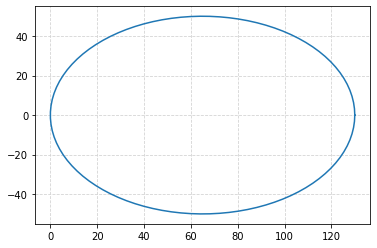

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot(focusx+65*np.cos(t) , 50*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()